In [38]:
import datetime
import requests
from pathlib import Path
import numpy as np
import pandas as pd
import re
import glob
import csv
import geopandas
import matplotlib.pyplot as plt

In [2]:
######## nan data frame ############
#station ID for col names
stations = pd.read_csv("BoM_weather_stations_download20140728_export.csv", header = 0)
#print(stations)
siteid = stations['Site']
siteid = ['m'+f'{i}' for i in siteid]
#print(len(siteid),siteid)

#make index names
year = np.arange(2000,2020)
#print(year)
month = np.arange(1,13)
#print(month)
year_months = []
for i in year:
    for j in month:
        year_month  =  'b'+f'{i}'+'_'+f'{j}'
        year_months.append(year_month)
year_months.append('b2020_1')
#year_months.append('2020-2')
#print(year_months)

# make a empty na df
np_kara = np.empty((241,20089))
np_kara[:,:] = np.nan
df_kara = pd.DataFrame(np_kara)

# name col and index(row)
df_kara.index = year_months
df_kara.columns = siteid

print(type(df_kara),df_kara["m1000"])

<class 'pandas.core.frame.DataFrame'> b2000_1    NaN
b2000_2    NaN
b2000_3    NaN
b2000_4    NaN
b2000_5    NaN
            ..
b2019_9    NaN
b2019_10   NaN
b2019_11   NaN
b2019_12   NaN
b2020_1    NaN
Name: m1000, Length: 241, dtype: float64


In [3]:
globf = glob.glob("data/*.csv")
print(len(globf))
globfsam = globf[0:len(globf)]#:len(globf)
#print(globfsam)

14312


In [4]:
def open_csv(globfsam):
    read = pd.read_csv(globfsam, header = 0)
    return read
# testes = open_csv(globfsam)
# print(testes)

In [5]:
def fileidfind(filename):
    id_pattern = re.compile(r'bo(m\d{4,8}).')
    idfind = re.findall(id_pattern,filename)
    return idfind
# idfind1 = fileidfind(globfsam)
# print(idfind1)

In [6]:
def addup(df):
    maxi = max(df['year'])
    mini = min(df['year'])
    #print(mini,maxi)
    over00 = df[(df['year'] > 1999) & (df['year'] < 2020)]
    rain_sum = over00.groupby(['year','month']).sum()
    rain_sum = rain_sum['rainfall']
    return rain_sum
# rain = addup(testes)
# print(type(rain),len(rain),rain)

In [7]:
def make_index(read_df,addup_df):
    
    ##making key index for from 2000 to max-1 year
    maxi = max(read_df['year'])
    #print(maxi)
    mini = min(read_df['year'])

    if mini<2000:
        mini = 2000
    else:
        mini = min(read_df['year'])
    #print(mini)
    
    if maxi == 2020:
        maxi = 2019
    else:
        maxi = max(read_df['year'])
        
    ra_range = np.arange(mini,maxi)
    #print(ra_range)

    month = np.arange(1,13)
    #print(month)

    year_months = []
    for i in ra_range:
        for j in month:
            year_month  = 'b'+ f'{i}'+'_'+f'{j}'
            year_months.append(year_month)

    #print(year_months)
    rm = read_df.query(f'year == {maxi}')
    rmmin = min(rm['month']) 
    rmmax = max(rm['month']) 
    lasty_month = np.arange(rmmin,rmmax+1)
    for i in lasty_month:
        year_month  = 'b'+ f'{maxi}'+'_'+f'{i}'
        year_months.append(year_month)

    addup_df.index = year_months
    makein_df = addup_df
    return makein_df

# makein_df1 = make_index(testes,rain)
# makein_df1
# # print(addup_df['b2000_1'])
# # df_kara.columns = siteid

# # print(year_months)

In [8]:
def assign_rainvalue(makein_df,df_kara,idfind):
    
    #print(idfind) 
    inds = makein_df.index.values
    #print(df_kara.loc['b2000_1'].at[idfind[0]])

    for i in inds:
        #print(i)
        #kara_col = df_kara.at[i,idfind1[0]]
        #print(df_kara.loc[i].at[idfind[0]])#
        #print(makein_df1[i])
        df_kara.loc[i].at[idfind[0]] = makein_df[i]
    return df_kara

# df_kara1 = assign_rainvalue(makein_df1, df_kara,idfind1)

# print(df_kara1)


In [9]:
for i in globfsam:
    print(f'start_{i}')
    csv = open_csv(i)
    #print(csv)
    fieldf = fileidfind(i)
    #print(fieldf)
    addu = addup(csv)
    #print(addu)
    if len(addu)==0:
        print(f'nodata_{i}')
        
    else:
        makei = make_index(csv,addu)
        #print(makei)
        df_kara = assign_rainvalue(makei,df_kara,fieldf)
        print(f'end_{i}')

start_data\bom1000.csv
nodata_data\bom1000.csv
start_data\bom10000.csv
end_data\bom10000.csv
start_data\bom10001.csv
nodata_data\bom10001.csv
start_data\bom10002.csv
end_data\bom10002.csv
start_data\bom10003.csv
nodata_data\bom10003.csv
start_data\bom10004.csv
end_data\bom10004.csv
start_data\bom10005.csv
nodata_data\bom10005.csv
start_data\bom10006.csv
end_data\bom10006.csv
start_data\bom10007.csv
end_data\bom10007.csv
start_data\bom10008.csv
nodata_data\bom10008.csv
start_data\bom10009.csv
end_data\bom10009.csv
start_data\bom1001.csv
end_data\bom1001.csv
start_data\bom10010.csv
end_data\bom10010.csv
start_data\bom10011.csv
end_data\bom10011.csv
start_data\bom10012.csv
end_data\bom10012.csv
start_data\bom10013.csv
nodata_data\bom10013.csv
start_data\bom10014.csv
nodata_data\bom10014.csv
start_data\bom10015.csv
nodata_data\bom10015.csv
start_data\bom10016.csv
end_data\bom10016.csv
start_data\bom10017.csv
end_data\bom10017.csv
start_data\bom10018.csv
end_data\bom10018.csv
start_data\bom

end_data\bom10163.csv
start_data\bom10164.csv
nodata_data\bom10164.csv
start_data\bom10165.csv
end_data\bom10165.csv
start_data\bom10166.csv
end_data\bom10166.csv
start_data\bom10167.csv
nodata_data\bom10167.csv
start_data\bom10168.csv
nodata_data\bom10168.csv
start_data\bom10169.csv
nodata_data\bom10169.csv
start_data\bom1017.csv
nodata_data\bom1017.csv
start_data\bom10170.csv
nodata_data\bom10170.csv
start_data\bom10171.csv
nodata_data\bom10171.csv
start_data\bom10172.csv
nodata_data\bom10172.csv
start_data\bom10173.csv
nodata_data\bom10173.csv
start_data\bom10174.csv
nodata_data\bom10174.csv
start_data\bom10175.csv
nodata_data\bom10175.csv
start_data\bom10176.csv
nodata_data\bom10176.csv
start_data\bom10177.csv
nodata_data\bom10177.csv
start_data\bom10178.csv
nodata_data\bom10178.csv
start_data\bom10179.csv
nodata_data\bom10179.csv
start_data\bom1018.csv
end_data\bom1018.csv
start_data\bom10180.csv
nodata_data\bom10180.csv
start_data\bom10181.csv
nodata_data\bom10181.csv
start_data\

end_data\bom10515.csv
start_data\bom10516.csv
nodata_data\bom10516.csv
start_data\bom10517.csv
nodata_data\bom10517.csv
start_data\bom10518.csv
end_data\bom10518.csv
start_data\bom10519.csv
end_data\bom10519.csv
start_data\bom10520.csv
end_data\bom10520.csv
start_data\bom10521.csv
nodata_data\bom10521.csv
start_data\bom10523.csv
nodata_data\bom10523.csv
start_data\bom10524.csv
end_data\bom10524.csv
start_data\bom10525.csv
end_data\bom10525.csv
start_data\bom10526.csv
end_data\bom10526.csv
start_data\bom10527.csv
end_data\bom10527.csv
start_data\bom10528.csv
end_data\bom10528.csv
start_data\bom10529.csv
nodata_data\bom10529.csv
start_data\bom10530.csv
end_data\bom10530.csv
start_data\bom10531.csv
end_data\bom10531.csv
start_data\bom10532.csv
end_data\bom10532.csv
start_data\bom10533.csv
nodata_data\bom10533.csv
start_data\bom10534.csv
end_data\bom10534.csv
start_data\bom10536.csv
end_data\bom10536.csv
start_data\bom10537.csv
end_data\bom10537.csv
start_data\bom10538.csv
end_data\bom1053

end_data\bom10699.csv
start_data\bom10700.csv
end_data\bom10700.csv
start_data\bom10701.csv
end_data\bom10701.csv
start_data\bom10702.csv
end_data\bom10702.csv
start_data\bom10703.csv
end_data\bom10703.csv
start_data\bom10704.csv
end_data\bom10704.csv
start_data\bom10705.csv
end_data\bom10705.csv
start_data\bom10706.csv
nodata_data\bom10706.csv
start_data\bom10707.csv
end_data\bom10707.csv
start_data\bom10708.csv
end_data\bom10708.csv
start_data\bom10710.csv
nodata_data\bom10710.csv
start_data\bom10711.csv
nodata_data\bom10711.csv
start_data\bom10712.csv
nodata_data\bom10712.csv
start_data\bom10713.csv
nodata_data\bom10713.csv
start_data\bom10714.csv
nodata_data\bom10714.csv
start_data\bom10715.csv
end_data\bom10715.csv
start_data\bom10716.csv
nodata_data\bom10716.csv
start_data\bom10717.csv
nodata_data\bom10717.csv
start_data\bom10718.csv
nodata_data\bom10718.csv
start_data\bom10719.csv
nodata_data\bom10719.csv
start_data\bom10720.csv
nodata_data\bom10720.csv
start_data\bom10721.csv
n

end_data\bom10876.csv
start_data\bom10877.csv
nodata_data\bom10877.csv
start_data\bom10878.csv
end_data\bom10878.csv
start_data\bom10879.csv
nodata_data\bom10879.csv
start_data\bom10880.csv
end_data\bom10880.csv
start_data\bom10881.csv
end_data\bom10881.csv
start_data\bom10883.csv
nodata_data\bom10883.csv
start_data\bom10884.csv
end_data\bom10884.csv
start_data\bom10885.csv
nodata_data\bom10885.csv
start_data\bom10886.csv
nodata_data\bom10886.csv
start_data\bom10888.csv
end_data\bom10888.csv
start_data\bom10889.csv
end_data\bom10889.csv
start_data\bom10890.csv
end_data\bom10890.csv
start_data\bom10891.csv
nodata_data\bom10891.csv
start_data\bom10892.csv
nodata_data\bom10892.csv
start_data\bom10893.csv
end_data\bom10893.csv
start_data\bom10894.csv
end_data\bom10894.csv
start_data\bom10895.csv
end_data\bom10895.csv
start_data\bom10896.csv
end_data\bom10896.csv
start_data\bom10897.csv
end_data\bom10897.csv
start_data\bom10898.csv
end_data\bom10898.csv
start_data\bom10899.csv
end_data\bom1

end_data\bom12064.csv
start_data\bom12065.csv
end_data\bom12065.csv
start_data\bom12066.csv
end_data\bom12066.csv
start_data\bom12067.csv
end_data\bom12067.csv
start_data\bom12068.csv
nodata_data\bom12068.csv
start_data\bom12069.csv
nodata_data\bom12069.csv
start_data\bom12070.csv
end_data\bom12070.csv
start_data\bom12071.csv
end_data\bom12071.csv
start_data\bom12072.csv
end_data\bom12072.csv
start_data\bom12073.csv
nodata_data\bom12073.csv
start_data\bom12074.csv
end_data\bom12074.csv
start_data\bom12075.csv
end_data\bom12075.csv
start_data\bom12076.csv
nodata_data\bom12076.csv
start_data\bom12077.csv
end_data\bom12077.csv
start_data\bom12078.csv
nodata_data\bom12078.csv
start_data\bom12079.csv
end_data\bom12079.csv
start_data\bom12080.csv
end_data\bom12080.csv
start_data\bom12081.csv
end_data\bom12081.csv
start_data\bom12082.csv
end_data\bom12082.csv
start_data\bom12083.csv
end_data\bom12083.csv
start_data\bom12084.csv
nodata_data\bom12084.csv
start_data\bom12085.csv
nodata_data\bom1

end_data\bom12247.csv
start_data\bom12248.csv
nodata_data\bom12248.csv
start_data\bom12249.csv
nodata_data\bom12249.csv
start_data\bom12250.csv
nodata_data\bom12250.csv
start_data\bom12251.csv
nodata_data\bom12251.csv
start_data\bom12252.csv
nodata_data\bom12252.csv
start_data\bom12253.csv
nodata_data\bom12253.csv
start_data\bom12254.csv
nodata_data\bom12254.csv
start_data\bom12255.csv
end_data\bom12255.csv
start_data\bom12256.csv
nodata_data\bom12256.csv
start_data\bom12258.csv
nodata_data\bom12258.csv
start_data\bom12259.csv
end_data\bom12259.csv
start_data\bom12260.csv
end_data\bom12260.csv
start_data\bom12261.csv
end_data\bom12261.csv
start_data\bom12262.csv
end_data\bom12262.csv
start_data\bom12263.csv
nodata_data\bom12263.csv
start_data\bom12265.csv
end_data\bom12265.csv
start_data\bom12267.csv
end_data\bom12267.csv
start_data\bom12268.csv
nodata_data\bom12268.csv
start_data\bom12269.csv
nodata_data\bom12269.csv
start_data\bom12270.csv
nodata_data\bom12270.csv
start_data\bom12271

end_data\bom14092.csv
start_data\bom14093.csv
nodata_data\bom14093.csv
start_data\bom14096.csv
nodata_data\bom14096.csv
start_data\bom14099.csv
nodata_data\bom14099.csv
start_data\bom14102.csv
nodata_data\bom14102.csv
start_data\bom14103.csv
nodata_data\bom14103.csv
start_data\bom14104.csv
nodata_data\bom14104.csv
start_data\bom14105.csv
nodata_data\bom14105.csv
start_data\bom14106.csv
nodata_data\bom14106.csv
start_data\bom14108.csv
nodata_data\bom14108.csv
start_data\bom14109.csv
nodata_data\bom14109.csv
start_data\bom14110.csv
nodata_data\bom14110.csv
start_data\bom14112.csv
end_data\bom14112.csv
start_data\bom14113.csv
end_data\bom14113.csv
start_data\bom14116.csv
end_data\bom14116.csv
start_data\bom14118.csv
nodata_data\bom14118.csv
start_data\bom14121.csv
nodata_data\bom14121.csv
start_data\bom14122.csv
nodata_data\bom14122.csv
start_data\bom14123.csv
nodata_data\bom14123.csv
start_data\bom14124.csv
nodata_data\bom14124.csv
start_data\bom14127.csv
nodata_data\bom14127.csv
start_d

end_data\bom14403.csv
start_data\bom14404.csv
end_data\bom14404.csv
start_data\bom14405.csv
end_data\bom14405.csv
start_data\bom14407.csv
end_data\bom14407.csv
start_data\bom14408.csv
end_data\bom14408.csv
start_data\bom14409.csv
end_data\bom14409.csv
start_data\bom14410.csv
end_data\bom14410.csv
start_data\bom14501.csv
end_data\bom14501.csv
start_data\bom14502.csv
nodata_data\bom14502.csv
start_data\bom14503.csv
nodata_data\bom14503.csv
start_data\bom14504.csv
end_data\bom14504.csv
start_data\bom14505.csv
end_data\bom14505.csv
start_data\bom14506.csv
nodata_data\bom14506.csv
start_data\bom14507.csv
end_data\bom14507.csv
start_data\bom14508.csv
end_data\bom14508.csv
start_data\bom14509.csv
end_data\bom14509.csv
start_data\bom14510.csv
nodata_data\bom14510.csv
start_data\bom14511.csv
end_data\bom14511.csv
start_data\bom14512.csv
end_data\bom14512.csv
start_data\bom14513.csv
nodata_data\bom14513.csv
start_data\bom14514.csv
nodata_data\bom14514.csv
start_data\bom14515.csv
end_data\bom1451

end_data\bom14903.csv
start_data\bom14904.csv
nodata_data\bom14904.csv
start_data\bom14905.csv
end_data\bom14905.csv
start_data\bom14906.csv
end_data\bom14906.csv
start_data\bom14907.csv
end_data\bom14907.csv
start_data\bom14908.csv
nodata_data\bom14908.csv
start_data\bom14909.csv
end_data\bom14909.csv
start_data\bom14910.csv
end_data\bom14910.csv
start_data\bom14911.csv
nodata_data\bom14911.csv
start_data\bom14912.csv
nodata_data\bom14912.csv
start_data\bom14913.csv
end_data\bom14913.csv
start_data\bom14914.csv
end_data\bom14914.csv
start_data\bom14915.csv
nodata_data\bom14915.csv
start_data\bom14916.csv
nodata_data\bom14916.csv
start_data\bom14917.csv
end_data\bom14917.csv
start_data\bom14918.csv
nodata_data\bom14918.csv
start_data\bom14919.csv
end_data\bom14919.csv
start_data\bom14920.csv
nodata_data\bom14920.csv
start_data\bom14921.csv
end_data\bom14921.csv
start_data\bom14922.csv
nodata_data\bom14922.csv
start_data\bom14923.csv
nodata_data\bom14923.csv
start_data\bom14924.csv
noda

end_data\bom15554.csv
start_data\bom15555.csv
end_data\bom15555.csv
start_data\bom15556.csv
nodata_data\bom15556.csv
start_data\bom15557.csv
nodata_data\bom15557.csv
start_data\bom15558.csv
nodata_data\bom15558.csv
start_data\bom15559.csv
end_data\bom15559.csv
start_data\bom15560.csv
end_data\bom15560.csv
start_data\bom15561.csv
end_data\bom15561.csv
start_data\bom15562.csv
end_data\bom15562.csv
start_data\bom15563.csv
nodata_data\bom15563.csv
start_data\bom15564.csv
end_data\bom15564.csv
start_data\bom15565.csv
end_data\bom15565.csv
start_data\bom15566.csv
end_data\bom15566.csv
start_data\bom15567.csv
nodata_data\bom15567.csv
start_data\bom15568.csv
nodata_data\bom15568.csv
start_data\bom15569.csv
nodata_data\bom15569.csv
start_data\bom15570.csv
nodata_data\bom15570.csv
start_data\bom15571.csv
end_data\bom15571.csv
start_data\bom15572.csv
end_data\bom15572.csv
start_data\bom15574.csv
end_data\bom15574.csv
start_data\bom15575.csv
end_data\bom15575.csv
start_data\bom15577.csv
end_data\b

nodata_data\bom16061.csv
start_data\bom16062.csv
end_data\bom16062.csv
start_data\bom16063.csv
nodata_data\bom16063.csv
start_data\bom16064.csv
nodata_data\bom16064.csv
start_data\bom16065.csv
end_data\bom16065.csv
start_data\bom16066.csv
nodata_data\bom16066.csv
start_data\bom16067.csv
end_data\bom16067.csv
start_data\bom16070.csv
nodata_data\bom16070.csv
start_data\bom16071.csv
nodata_data\bom16071.csv
start_data\bom16072.csv
nodata_data\bom16072.csv
start_data\bom16073.csv
nodata_data\bom16073.csv
start_data\bom16074.csv
nodata_data\bom16074.csv
start_data\bom16075.csv
end_data\bom16075.csv
start_data\bom16076.csv
nodata_data\bom16076.csv
start_data\bom16078.csv
nodata_data\bom16078.csv
start_data\bom16081.csv
nodata_data\bom16081.csv
start_data\bom16082.csv
end_data\bom16082.csv
start_data\bom16083.csv
end_data\bom16083.csv
start_data\bom16084.csv
end_data\bom16084.csv
start_data\bom16085.csv
end_data\bom16085.csv
start_data\bom16086.csv
end_data\bom16086.csv
start_data\bom16087.cs

end_data\bom18006.csv
start_data\bom18007.csv
end_data\bom18007.csv
start_data\bom18008.csv
nodata_data\bom18008.csv
start_data\bom18009.csv
nodata_data\bom18009.csv
start_data\bom18010.csv
nodata_data\bom18010.csv
start_data\bom18011.csv
nodata_data\bom18011.csv
start_data\bom18012.csv
end_data\bom18012.csv
start_data\bom18013.csv
nodata_data\bom18013.csv
start_data\bom18014.csv
end_data\bom18014.csv
start_data\bom18015.csv
nodata_data\bom18015.csv
start_data\bom18016.csv
nodata_data\bom18016.csv
start_data\bom18017.csv
end_data\bom18017.csv
start_data\bom18018.csv
nodata_data\bom18018.csv
start_data\bom18019.csv
end_data\bom18019.csv
start_data\bom18020.csv
nodata_data\bom18020.csv
start_data\bom18021.csv
nodata_data\bom18021.csv
start_data\bom18022.csv
end_data\bom18022.csv
start_data\bom18023.csv
end_data\bom18023.csv
start_data\bom18024.csv
end_data\bom18024.csv
start_data\bom18025.csv
nodata_data\bom18025.csv
start_data\bom18026.csv
nodata_data\bom18026.csv
start_data\bom18027.cs

end_data\bom18186.csv
start_data\bom18187.csv
end_data\bom18187.csv
start_data\bom18188.csv
end_data\bom18188.csv
start_data\bom18189.csv
end_data\bom18189.csv
start_data\bom18190.csv
end_data\bom18190.csv
start_data\bom18191.csv
end_data\bom18191.csv
start_data\bom18192.csv
end_data\bom18192.csv
start_data\bom18193.csv
end_data\bom18193.csv
start_data\bom18194.csv
nodata_data\bom18194.csv
start_data\bom18195.csv
end_data\bom18195.csv
start_data\bom18196.csv
end_data\bom18196.csv
start_data\bom18197.csv
end_data\bom18197.csv
start_data\bom18198.csv
end_data\bom18198.csv
start_data\bom18201.csv
end_data\bom18201.csv
start_data\bom18202.csv
end_data\bom18202.csv
start_data\bom18203.csv
end_data\bom18203.csv
start_data\bom18204.csv
end_data\bom18204.csv
start_data\bom18205.csv
end_data\bom18205.csv
start_data\bom18208.csv
end_data\bom18208.csv
start_data\bom18209.csv
end_data\bom18209.csv
start_data\bom18210.csv
end_data\bom18210.csv
start_data\bom18211.csv
end_data\bom18211.csv
start_dat

end_data\bom20017.csv
start_data\bom20018.csv
nodata_data\bom20018.csv
start_data\bom20019.csv
end_data\bom20019.csv
start_data\bom2002.csv
nodata_data\bom2002.csv
start_data\bom20020.csv
end_data\bom20020.csv
start_data\bom20021.csv
end_data\bom20021.csv
start_data\bom20022.csv
end_data\bom20022.csv
start_data\bom20023.csv
nodata_data\bom20023.csv
start_data\bom20024.csv
end_data\bom20024.csv
start_data\bom20025.csv
end_data\bom20025.csv
start_data\bom20026.csv
nodata_data\bom20026.csv
start_data\bom200264.csv
end_data\bom200264.csv
start_data\bom20027.csv
nodata_data\bom20027.csv
start_data\bom20028.csv
end_data\bom20028.csv
start_data\bom200283.csv
end_data\bom200283.csv
start_data\bom200284.csv
end_data\bom200284.csv
start_data\bom200288.csv
end_data\bom200288.csv
start_data\bom20029.csv
nodata_data\bom20029.csv
start_data\bom2003.csv
nodata_data\bom2003.csv
start_data\bom20030.csv
end_data\bom20030.csv
start_data\bom200304.csv
nodata_data\bom200304.csv
start_data\bom20031.csv
noda

end_data\bom21031.csv
start_data\bom21032.csv
end_data\bom21032.csv
start_data\bom21033.csv
end_data\bom21033.csv
start_data\bom21034.csv
end_data\bom21034.csv
start_data\bom21035.csv
end_data\bom21035.csv
start_data\bom21036.csv
end_data\bom21036.csv
start_data\bom21037.csv
nodata_data\bom21037.csv
start_data\bom21038.csv
nodata_data\bom21038.csv
start_data\bom21039.csv
nodata_data\bom21039.csv
start_data\bom21040.csv
nodata_data\bom21040.csv
start_data\bom21041.csv
end_data\bom21041.csv
start_data\bom21042.csv
end_data\bom21042.csv
start_data\bom21043.csv
end_data\bom21043.csv
start_data\bom21044.csv
end_data\bom21044.csv
start_data\bom21045.csv
end_data\bom21045.csv
start_data\bom21046.csv
end_data\bom21046.csv
start_data\bom21047.csv
end_data\bom21047.csv
start_data\bom21048.csv
nodata_data\bom21048.csv
start_data\bom21049.csv
nodata_data\bom21049.csv
start_data\bom21050.csv
end_data\bom21050.csv
start_data\bom21051.csv
nodata_data\bom21051.csv
start_data\bom21052.csv
nodata_data\b

nodata_data\bom22812.csv
start_data\bom22813.csv
nodata_data\bom22813.csv
start_data\bom22814.csv
nodata_data\bom22814.csv
start_data\bom22815.csv
end_data\bom22815.csv
start_data\bom22816.csv
end_data\bom22816.csv
start_data\bom22817.csv
end_data\bom22817.csv
start_data\bom22818.csv
nodata_data\bom22818.csv
start_data\bom22819.csv
nodata_data\bom22819.csv
start_data\bom22820.csv
end_data\bom22820.csv
start_data\bom22821.csv
nodata_data\bom22821.csv
start_data\bom22822.csv
end_data\bom22822.csv
start_data\bom22823.csv
end_data\bom22823.csv
start_data\bom22824.csv
end_data\bom22824.csv
start_data\bom22825.csv
nodata_data\bom22825.csv
start_data\bom22826.csv
nodata_data\bom22826.csv
start_data\bom22827.csv
nodata_data\bom22827.csv
start_data\bom22828.csv
nodata_data\bom22828.csv
start_data\bom22829.csv
nodata_data\bom22829.csv
start_data\bom22830.csv
end_data\bom22830.csv
start_data\bom22831.csv
end_data\bom22831.csv
start_data\bom22832.csv
nodata_data\bom22832.csv
start_data\bom22835.cs

end_data\bom23325.csv
start_data\bom23326.csv
nodata_data\bom23326.csv
start_data\bom23327.csv
nodata_data\bom23327.csv
start_data\bom23328.csv
nodata_data\bom23328.csv
start_data\bom23329.csv
nodata_data\bom23329.csv
start_data\bom23330.csv
nodata_data\bom23330.csv
start_data\bom23331.csv
nodata_data\bom23331.csv
start_data\bom23332.csv
nodata_data\bom23332.csv
start_data\bom23333.csv
nodata_data\bom23333.csv
start_data\bom23334.csv
nodata_data\bom23334.csv
start_data\bom23335.csv
nodata_data\bom23335.csv
start_data\bom23336.csv
nodata_data\bom23336.csv
start_data\bom23337.csv
nodata_data\bom23337.csv
start_data\bom23338.csv
nodata_data\bom23338.csv
start_data\bom23339.csv
nodata_data\bom23339.csv
start_data\bom23340.csv
nodata_data\bom23340.csv
start_data\bom23341.csv
nodata_data\bom23341.csv
start_data\bom23342.csv
nodata_data\bom23342.csv
start_data\bom23343.csv
end_data\bom23343.csv
start_data\bom23344.csv
nodata_data\bom23344.csv
start_data\bom23345.csv
nodata_data\bom23345.csv
s

end_data\bom23829.csv
start_data\bom23830.csv
end_data\bom23830.csv
start_data\bom23831.csv
nodata_data\bom23831.csv
start_data\bom23832.csv
nodata_data\bom23832.csv
start_data\bom23833.csv
nodata_data\bom23833.csv
start_data\bom23834.csv
end_data\bom23834.csv
start_data\bom23835.csv
nodata_data\bom23835.csv
start_data\bom23836.csv
nodata_data\bom23836.csv
start_data\bom23838.csv
nodata_data\bom23838.csv
start_data\bom23839.csv
end_data\bom23839.csv
start_data\bom23840.csv
nodata_data\bom23840.csv
start_data\bom23841.csv
nodata_data\bom23841.csv
start_data\bom23842.csv
end_data\bom23842.csv
start_data\bom23843.csv
end_data\bom23843.csv
start_data\bom23844.csv
nodata_data\bom23844.csv
start_data\bom23845.csv
end_data\bom23845.csv
start_data\bom23846.csv
end_data\bom23846.csv
start_data\bom23847.csv
nodata_data\bom23847.csv
start_data\bom23848.csv
nodata_data\bom23848.csv
start_data\bom23849.csv
end_data\bom23849.csv
start_data\bom23858.csv
end_data\bom23858.csv
start_data\bom23860.csv
e

end_data\bom24572.csv
start_data\bom24573.csv
end_data\bom24573.csv
start_data\bom24575.csv
end_data\bom24575.csv
start_data\bom24576.csv
end_data\bom24576.csv
start_data\bom24577.csv
end_data\bom24577.csv
start_data\bom24578.csv
end_data\bom24578.csv
start_data\bom24579.csv
end_data\bom24579.csv
start_data\bom24580.csv
end_data\bom24580.csv
start_data\bom24581.csv
end_data\bom24581.csv
start_data\bom24582.csv
end_data\bom24582.csv
start_data\bom24583.csv
end_data\bom24583.csv
start_data\bom24584.csv
end_data\bom24584.csv
start_data\bom24585.csv
end_data\bom24585.csv
start_data\bom24586.csv
end_data\bom24586.csv
start_data\bom24587.csv
end_data\bom24587.csv
start_data\bom24588.csv
end_data\bom24588.csv
start_data\bom24589.csv
end_data\bom24589.csv
start_data\bom25000.csv
end_data\bom25000.csv
start_data\bom25001.csv
nodata_data\bom25001.csv
start_data\bom25002.csv
end_data\bom25002.csv
start_data\bom25003.csv
end_data\bom25003.csv
start_data\bom25004.csv
end_data\bom25004.csv
start_dat

end_data\bom26050.csv
start_data\bom26051.csv
nodata_data\bom26051.csv
start_data\bom26052.csv
nodata_data\bom26052.csv
start_data\bom26053.csv
end_data\bom26053.csv
start_data\bom26054.csv
end_data\bom26054.csv
start_data\bom26055.csv
nodata_data\bom26055.csv
start_data\bom26056.csv
nodata_data\bom26056.csv
start_data\bom26057.csv
end_data\bom26057.csv
start_data\bom26058.csv
end_data\bom26058.csv
start_data\bom26059.csv
end_data\bom26059.csv
start_data\bom26060.csv
nodata_data\bom26060.csv
start_data\bom26061.csv
nodata_data\bom26061.csv
start_data\bom26062.csv
end_data\bom26062.csv
start_data\bom26063.csv
nodata_data\bom26063.csv
start_data\bom26064.csv
nodata_data\bom26064.csv
start_data\bom26065.csv
end_data\bom26065.csv
start_data\bom26066.csv
nodata_data\bom26066.csv
start_data\bom26067.csv
end_data\bom26067.csv
start_data\bom26068.csv
nodata_data\bom26068.csv
start_data\bom26069.csv
end_data\bom26069.csv
start_data\bom26070.csv
nodata_data\bom26070.csv
start_data\bom26071.csv
e

end_data\bom29001.csv
start_data\bom29002.csv
end_data\bom29002.csv
start_data\bom29003.csv
nodata_data\bom29003.csv
start_data\bom29004.csv
end_data\bom29004.csv
start_data\bom29005.csv
end_data\bom29005.csv
start_data\bom29006.csv
nodata_data\bom29006.csv
start_data\bom29007.csv
end_data\bom29007.csv
start_data\bom29008.csv
end_data\bom29008.csv
start_data\bom29009.csv
nodata_data\bom29009.csv
start_data\bom29010.csv
nodata_data\bom29010.csv
start_data\bom29011.csv
end_data\bom29011.csv
start_data\bom29012.csv
end_data\bom29012.csv
start_data\bom29013.csv
end_data\bom29013.csv
start_data\bom29014.csv
end_data\bom29014.csv
start_data\bom29015.csv
end_data\bom29015.csv
start_data\bom29016.csv
end_data\bom29016.csv
start_data\bom29017.csv
nodata_data\bom29017.csv
start_data\bom29018.csv
nodata_data\bom29018.csv
start_data\bom29019.csv
nodata_data\bom29019.csv
start_data\bom29020.csv
nodata_data\bom29020.csv
start_data\bom29021.csv
nodata_data\bom29021.csv
start_data\bom29022.csv
end_dat

nodata_data\bom30012.csv
start_data\bom30013.csv
nodata_data\bom30013.csv
start_data\bom30014.csv
end_data\bom30014.csv
start_data\bom30015.csv
nodata_data\bom30015.csv
start_data\bom30016.csv
nodata_data\bom30016.csv
start_data\bom30017.csv
nodata_data\bom30017.csv
start_data\bom30018.csv
end_data\bom30018.csv
start_data\bom30019.csv
end_data\bom30019.csv
start_data\bom3002.csv
nodata_data\bom3002.csv
start_data\bom30020.csv
end_data\bom30020.csv
start_data\bom30021.csv
end_data\bom30021.csv
start_data\bom30022.csv
end_data\bom30022.csv
start_data\bom30023.csv
end_data\bom30023.csv
start_data\bom30024.csv
end_data\bom30024.csv
start_data\bom30025.csv
end_data\bom30025.csv
start_data\bom30026.csv
end_data\bom30026.csv
start_data\bom30027.csv
end_data\bom30027.csv
start_data\bom30028.csv
nodata_data\bom30028.csv
start_data\bom30029.csv
nodata_data\bom30029.csv
start_data\bom3003.csv
end_data\bom3003.csv
start_data\bom30030.csv
end_data\bom30030.csv
start_data\bom30031.csv
nodata_data\bo

end_data\bom3040.csv
start_data\bom3041.csv
end_data\bom3041.csv
start_data\bom3042.csv
nodata_data\bom3042.csv
start_data\bom3043.csv
end_data\bom3043.csv
start_data\bom3044.csv
end_data\bom3044.csv
start_data\bom3045.csv
nodata_data\bom3045.csv
start_data\bom3046.csv
nodata_data\bom3046.csv
start_data\bom3047.csv
nodata_data\bom3047.csv
start_data\bom3048.csv
end_data\bom3048.csv
start_data\bom3049.csv
nodata_data\bom3049.csv
start_data\bom3050.csv
nodata_data\bom3050.csv
start_data\bom3051.csv
end_data\bom3051.csv
start_data\bom3052.csv
end_data\bom3052.csv
start_data\bom3053.csv
nodata_data\bom3053.csv
start_data\bom3054.csv
nodata_data\bom3054.csv
start_data\bom3055.csv
nodata_data\bom3055.csv
start_data\bom3056.csv
end_data\bom3056.csv
start_data\bom3057.csv
end_data\bom3057.csv
start_data\bom3058.csv
nodata_data\bom3058.csv
start_data\bom3059.csv
end_data\bom3059.csv
start_data\bom3060.csv
nodata_data\bom3060.csv
start_data\bom3061.csv
nodata_data\bom3061.csv
start_data\bom3062.

end_data\bom31119.csv
start_data\bom31120.csv
nodata_data\bom31120.csv
start_data\bom31122.csv
end_data\bom31122.csv
start_data\bom31123.csv
nodata_data\bom31123.csv
start_data\bom31124.csv
end_data\bom31124.csv
start_data\bom31125.csv
end_data\bom31125.csv
start_data\bom31126.csv
nodata_data\bom31126.csv
start_data\bom31127.csv
end_data\bom31127.csv
start_data\bom31128.csv
nodata_data\bom31128.csv
start_data\bom31129.csv
end_data\bom31129.csv
start_data\bom31130.csv
end_data\bom31130.csv
start_data\bom31131.csv
end_data\bom31131.csv
start_data\bom31132.csv
nodata_data\bom31132.csv
start_data\bom31133.csv
nodata_data\bom31133.csv
start_data\bom31134.csv
nodata_data\bom31134.csv
start_data\bom31135.csv
nodata_data\bom31135.csv
start_data\bom31136.csv
nodata_data\bom31136.csv
start_data\bom31137.csv
nodata_data\bom31137.csv
start_data\bom31138.csv
nodata_data\bom31138.csv
start_data\bom31139.csv
nodata_data\bom31139.csv
start_data\bom31140.csv
end_data\bom31140.csv
start_data\bom31141.cs

end_data\bom32094.csv
start_data\bom32095.csv
end_data\bom32095.csv
start_data\bom32096.csv
end_data\bom32096.csv
start_data\bom32098.csv
end_data\bom32098.csv
start_data\bom32099.csv
end_data\bom32099.csv
start_data\bom32100.csv
end_data\bom32100.csv
start_data\bom32101.csv
end_data\bom32101.csv
start_data\bom32102.csv
end_data\bom32102.csv
start_data\bom32104.csv
end_data\bom32104.csv
start_data\bom32105.csv
end_data\bom32105.csv
start_data\bom32106.csv
nodata_data\bom32106.csv
start_data\bom32107.csv
nodata_data\bom32107.csv
start_data\bom32108.csv
end_data\bom32108.csv
start_data\bom32109.csv
end_data\bom32109.csv
start_data\bom32110.csv
nodata_data\bom32110.csv
start_data\bom32111.csv
nodata_data\bom32111.csv
start_data\bom32114.csv
nodata_data\bom32114.csv
start_data\bom32117.csv
end_data\bom32117.csv
start_data\bom32118.csv
end_data\bom32118.csv
start_data\bom32119.csv
end_data\bom32119.csv
start_data\bom32121.csv
nodata_data\bom32121.csv
start_data\bom32122.csv
end_data\bom3212

end_data\bom33110.csv
start_data\bom33111.csv
end_data\bom33111.csv
start_data\bom33112.csv
nodata_data\bom33112.csv
start_data\bom33113.csv
nodata_data\bom33113.csv
start_data\bom33114.csv
end_data\bom33114.csv
start_data\bom33115.csv
nodata_data\bom33115.csv
start_data\bom33116.csv
nodata_data\bom33116.csv
start_data\bom33117.csv
nodata_data\bom33117.csv
start_data\bom33118.csv
nodata_data\bom33118.csv
start_data\bom33119.csv
end_data\bom33119.csv
start_data\bom33120.csv
nodata_data\bom33120.csv
start_data\bom33121.csv
nodata_data\bom33121.csv
start_data\bom33122.csv
end_data\bom33122.csv
start_data\bom33123.csv
nodata_data\bom33123.csv
start_data\bom33124.csv
nodata_data\bom33124.csv
start_data\bom33125.csv
end_data\bom33125.csv
start_data\bom33126.csv
nodata_data\bom33126.csv
start_data\bom33127.csv
end_data\bom33127.csv
start_data\bom33128.csv
end_data\bom33128.csv
start_data\bom33129.csv
end_data\bom33129.csv
start_data\bom33130.csv
nodata_data\bom33130.csv
start_data\bom33131.cs

end_data\bom33320.csv
start_data\bom33322.csv
end_data\bom33322.csv
start_data\bom33323.csv
end_data\bom33323.csv
start_data\bom34000.csv
end_data\bom34000.csv
start_data\bom34001.csv
end_data\bom34001.csv
start_data\bom34002.csv
nodata_data\bom34002.csv
start_data\bom34003.csv
end_data\bom34003.csv
start_data\bom34004.csv
end_data\bom34004.csv
start_data\bom34005.csv
nodata_data\bom34005.csv
start_data\bom34006.csv
end_data\bom34006.csv
start_data\bom34007.csv
end_data\bom34007.csv
start_data\bom34008.csv
nodata_data\bom34008.csv
start_data\bom34009.csv
nodata_data\bom34009.csv
start_data\bom34010.csv
end_data\bom34010.csv
start_data\bom34011.csv
nodata_data\bom34011.csv
start_data\bom34012.csv
end_data\bom34012.csv
start_data\bom34013.csv
nodata_data\bom34013.csv
start_data\bom34014.csv
nodata_data\bom34014.csv
start_data\bom34015.csv
end_data\bom34015.csv
start_data\bom34016.csv
end_data\bom34016.csv
start_data\bom34017.csv
end_data\bom34017.csv
start_data\bom34018.csv
nodata_data\b

end_data\bom35082.csv
start_data\bom35083.csv
end_data\bom35083.csv
start_data\bom35084.csv
nodata_data\bom35084.csv
start_data\bom35085.csv
nodata_data\bom35085.csv
start_data\bom35086.csv
nodata_data\bom35086.csv
start_data\bom35087.csv
end_data\bom35087.csv
start_data\bom35088.csv
end_data\bom35088.csv
start_data\bom35089.csv
nodata_data\bom35089.csv
start_data\bom35090.csv
end_data\bom35090.csv
start_data\bom35091.csv
nodata_data\bom35091.csv
start_data\bom35092.csv
end_data\bom35092.csv
start_data\bom35093.csv
end_data\bom35093.csv
start_data\bom35094.csv
end_data\bom35094.csv
start_data\bom35095.csv
nodata_data\bom35095.csv
start_data\bom35096.csv
end_data\bom35096.csv
start_data\bom35097.csv
nodata_data\bom35097.csv
start_data\bom35098.csv
nodata_data\bom35098.csv
start_data\bom35099.csv
nodata_data\bom35099.csv
start_data\bom35100.csv
nodata_data\bom35100.csv
start_data\bom35101.csv
nodata_data\bom35101.csv
start_data\bom35102.csv
end_data\bom35102.csv
start_data\bom35103.csv
e

end_data\bom35271.csv
start_data\bom35272.csv
end_data\bom35272.csv
start_data\bom35273.csv
end_data\bom35273.csv
start_data\bom35274.csv
end_data\bom35274.csv
start_data\bom35275.csv
end_data\bom35275.csv
start_data\bom35276.csv
end_data\bom35276.csv
start_data\bom35278.csv
end_data\bom35278.csv
start_data\bom35279.csv
end_data\bom35279.csv
start_data\bom35280.csv
end_data\bom35280.csv
start_data\bom35281.csv
end_data\bom35281.csv
start_data\bom35282.csv
end_data\bom35282.csv
start_data\bom35283.csv
end_data\bom35283.csv
start_data\bom35286.csv
end_data\bom35286.csv
start_data\bom35287.csv
nodata_data\bom35287.csv
start_data\bom35288.csv
nodata_data\bom35288.csv
start_data\bom35289.csv
end_data\bom35289.csv
start_data\bom35290.csv
end_data\bom35290.csv
start_data\bom35291.csv
end_data\bom35291.csv
start_data\bom35292.csv
end_data\bom35292.csv
start_data\bom35293.csv
end_data\bom35293.csv
start_data\bom35294.csv
end_data\bom35294.csv
start_data\bom35295.csv
end_data\bom35295.csv
start_

end_data\bom36159.csv
start_data\bom36160.csv
end_data\bom36160.csv
start_data\bom36161.csv
end_data\bom36161.csv
start_data\bom36163.csv
end_data\bom36163.csv
start_data\bom36165.csv
end_data\bom36165.csv
start_data\bom36166.csv
end_data\bom36166.csv
start_data\bom36167.csv
nodata_data\bom36167.csv
start_data\bom36168.csv
end_data\bom36168.csv
start_data\bom36169.csv
end_data\bom36169.csv
start_data\bom36171.csv
end_data\bom36171.csv
start_data\bom36172.csv
end_data\bom36172.csv
start_data\bom37000.csv
end_data\bom37000.csv
start_data\bom37001.csv
end_data\bom37001.csv
start_data\bom37002.csv
end_data\bom37002.csv
start_data\bom37003.csv
end_data\bom37003.csv
start_data\bom37004.csv
nodata_data\bom37004.csv
start_data\bom37005.csv
end_data\bom37005.csv
start_data\bom37006.csv
end_data\bom37006.csv
start_data\bom37007.csv
end_data\bom37007.csv
start_data\bom37008.csv
end_data\bom37008.csv
start_data\bom37009.csv
end_data\bom37009.csv
start_data\bom37010.csv
end_data\bom37010.csv
start_

nodata_data\bom38065.csv
start_data\bom38066.csv
end_data\bom38066.csv
start_data\bom38067.csv
nodata_data\bom38067.csv
start_data\bom38072.csv
end_data\bom38072.csv
start_data\bom38073.csv
end_data\bom38073.csv
start_data\bom38075.csv
end_data\bom38075.csv
start_data\bom39000.csv
end_data\bom39000.csv
start_data\bom39001.csv
end_data\bom39001.csv
start_data\bom39002.csv
end_data\bom39002.csv
start_data\bom39003.csv
end_data\bom39003.csv
start_data\bom39004.csv
end_data\bom39004.csv
start_data\bom39005.csv
nodata_data\bom39005.csv
start_data\bom39006.csv
nodata_data\bom39006.csv
start_data\bom39007.csv
nodata_data\bom39007.csv
start_data\bom39008.csv
end_data\bom39008.csv
start_data\bom39009.csv
end_data\bom39009.csv
start_data\bom39010.csv
end_data\bom39010.csv
start_data\bom39011.csv
end_data\bom39011.csv
start_data\bom39012.csv
nodata_data\bom39012.csv
start_data\bom39013.csv
nodata_data\bom39013.csv
start_data\bom39014.csv
nodata_data\bom39014.csv
start_data\bom39015.csv
nodata_dat

end_data\bom39174.csv
start_data\bom39175.csv
end_data\bom39175.csv
start_data\bom39176.csv
nodata_data\bom39176.csv
start_data\bom39177.csv
end_data\bom39177.csv
start_data\bom39178.csv
nodata_data\bom39178.csv
start_data\bom39179.csv
nodata_data\bom39179.csv
start_data\bom39180.csv
nodata_data\bom39180.csv
start_data\bom39181.csv
nodata_data\bom39181.csv
start_data\bom39182.csv
nodata_data\bom39182.csv
start_data\bom39183.csv
nodata_data\bom39183.csv
start_data\bom39184.csv
end_data\bom39184.csv
start_data\bom39185.csv
nodata_data\bom39185.csv
start_data\bom39186.csv
end_data\bom39186.csv
start_data\bom39187.csv
nodata_data\bom39187.csv
start_data\bom39188.csv
nodata_data\bom39188.csv
start_data\bom39190.csv
nodata_data\bom39190.csv
start_data\bom39192.csv
nodata_data\bom39192.csv
start_data\bom39193.csv
end_data\bom39193.csv
start_data\bom39194.csv
nodata_data\bom39194.csv
start_data\bom39195.csv
nodata_data\bom39195.csv
start_data\bom39196.csv
end_data\bom39196.csv
start_data\bom39

end_data\bom40013.csv
start_data\bom40014.csv
end_data\bom40014.csv
start_data\bom40015.csv
end_data\bom40015.csv
start_data\bom40016.csv
nodata_data\bom40016.csv
start_data\bom40017.csv
end_data\bom40017.csv
start_data\bom40018.csv
nodata_data\bom40018.csv
start_data\bom40019.csv
nodata_data\bom40019.csv
start_data\bom4002.csv
nodata_data\bom4002.csv
start_data\bom40020.csv
end_data\bom40020.csv
start_data\bom40021.csv
end_data\bom40021.csv
start_data\bom40022.csv
nodata_data\bom40022.csv
start_data\bom40023.csv
nodata_data\bom40023.csv
start_data\bom40024.csv
end_data\bom40024.csv
start_data\bom40025.csv
nodata_data\bom40025.csv
start_data\bom40026.csv
end_data\bom40026.csv
start_data\bom40027.csv
nodata_data\bom40027.csv
start_data\bom40028.csv
end_data\bom40028.csv
start_data\bom40029.csv
end_data\bom40029.csv
start_data\bom4003.csv
nodata_data\bom4003.csv
start_data\bom40030.csv
nodata_data\bom40030.csv
start_data\bom40031.csv
nodata_data\bom40031.csv
start_data\bom40032.csv
nodat

end_data\bom40171.csv
start_data\bom40172.csv
nodata_data\bom40172.csv
start_data\bom40173.csv
nodata_data\bom40173.csv
start_data\bom40174.csv
nodata_data\bom40174.csv
start_data\bom40175.csv
end_data\bom40175.csv
start_data\bom40176.csv
end_data\bom40176.csv
start_data\bom40177.csv
end_data\bom40177.csv
start_data\bom40178.csv
end_data\bom40178.csv
start_data\bom40179.csv
nodata_data\bom40179.csv
start_data\bom4018.csv
nodata_data\bom4018.csv
start_data\bom40180.csv
nodata_data\bom40180.csv
start_data\bom40181.csv
nodata_data\bom40181.csv
start_data\bom40182.csv
end_data\bom40182.csv
start_data\bom40183.csv
end_data\bom40183.csv
start_data\bom40184.csv
end_data\bom40184.csv
start_data\bom40185.csv
end_data\bom40185.csv
start_data\bom40186.csv
end_data\bom40186.csv
start_data\bom40187.csv
nodata_data\bom40187.csv
start_data\bom40188.csv
end_data\bom40188.csv
start_data\bom40189.csv
end_data\bom40189.csv
start_data\bom4019.csv
end_data\bom4019.csv
start_data\bom40190.csv
end_data\bom40

nodata_data\bom40336.csv
start_data\bom40337.csv
nodata_data\bom40337.csv
start_data\bom40338.csv
nodata_data\bom40338.csv
start_data\bom40339.csv
nodata_data\bom40339.csv
start_data\bom4034.csv
nodata_data\bom4034.csv
start_data\bom40340.csv
nodata_data\bom40340.csv
start_data\bom40341.csv
end_data\bom40341.csv
start_data\bom40342.csv
nodata_data\bom40342.csv
start_data\bom40343.csv
end_data\bom40343.csv
start_data\bom40344.csv
nodata_data\bom40344.csv
start_data\bom40345.csv
end_data\bom40345.csv
start_data\bom40346.csv
nodata_data\bom40346.csv
start_data\bom40347.csv
nodata_data\bom40347.csv
start_data\bom40348.csv
nodata_data\bom40348.csv
start_data\bom40349.csv
nodata_data\bom40349.csv
start_data\bom4035.csv
end_data\bom4035.csv
start_data\bom40350.csv
nodata_data\bom40350.csv
start_data\bom40351.csv
nodata_data\bom40351.csv
start_data\bom40352.csv
nodata_data\bom40352.csv
start_data\bom40353.csv
nodata_data\bom40353.csv
start_data\bom40354.csv
nodata_data\bom40354.csv
start_data\

nodata_data\bom40522.csv
start_data\bom40523.csv
end_data\bom40523.csv
start_data\bom40524.csv
end_data\bom40524.csv
start_data\bom40525.csv
end_data\bom40525.csv
start_data\bom40527.csv
nodata_data\bom40527.csv
start_data\bom40529.csv
nodata_data\bom40529.csv
start_data\bom4053.csv
nodata_data\bom4053.csv
start_data\bom40530.csv
end_data\bom40530.csv
start_data\bom40531.csv
end_data\bom40531.csv
start_data\bom40532.csv
nodata_data\bom40532.csv
start_data\bom40533.csv
nodata_data\bom40533.csv
start_data\bom40534.csv
end_data\bom40534.csv
start_data\bom40535.csv
nodata_data\bom40535.csv
start_data\bom40536.csv
end_data\bom40536.csv
start_data\bom40537.csv
end_data\bom40537.csv
start_data\bom40538.csv
nodata_data\bom40538.csv
start_data\bom4054.csv
end_data\bom4054.csv
start_data\bom40542.csv
end_data\bom40542.csv
start_data\bom40543.csv
end_data\bom40543.csv
start_data\bom40544.csv
end_data\bom40544.csv
start_data\bom40547.csv
end_data\bom40547.csv
start_data\bom4055.csv
nodata_data\bom

end_data\bom40754.csv
start_data\bom40755.csv
end_data\bom40755.csv
start_data\bom40756.csv
end_data\bom40756.csv
start_data\bom40757.csv
end_data\bom40757.csv
start_data\bom40759.csv
end_data\bom40759.csv
start_data\bom4076.csv
nodata_data\bom4076.csv
start_data\bom40761.csv
end_data\bom40761.csv
start_data\bom40762.csv
end_data\bom40762.csv
start_data\bom40763.csv
end_data\bom40763.csv
start_data\bom40764.csv
end_data\bom40764.csv
start_data\bom40765.csv
nodata_data\bom40765.csv
start_data\bom40766.csv
end_data\bom40766.csv
start_data\bom40767.csv
end_data\bom40767.csv
start_data\bom40768.csv
end_data\bom40768.csv
start_data\bom40769.csv
nodata_data\bom40769.csv
start_data\bom4077.csv
nodata_data\bom4077.csv
start_data\bom40770.csv
end_data\bom40770.csv
start_data\bom40771.csv
nodata_data\bom40771.csv
start_data\bom40774.csv
end_data\bom40774.csv
start_data\bom40775.csv
nodata_data\bom40775.csv
start_data\bom40777.csv
end_data\bom40777.csv
start_data\bom40778.csv
end_data\bom40778.cs

end_data\bom40958.csv
start_data\bom4096.csv
nodata_data\bom4096.csv
start_data\bom40960.csv
end_data\bom40960.csv
start_data\bom40962.csv
end_data\bom40962.csv
start_data\bom40963.csv
end_data\bom40963.csv
start_data\bom40964.csv
end_data\bom40964.csv
start_data\bom40965.csv
end_data\bom40965.csv
start_data\bom40967.csv
end_data\bom40967.csv
start_data\bom40968.csv
end_data\bom40968.csv
start_data\bom40969.csv
end_data\bom40969.csv
start_data\bom4097.csv
end_data\bom4097.csv
start_data\bom40970.csv
end_data\bom40970.csv
start_data\bom40972.csv
end_data\bom40972.csv
start_data\bom40973.csv
end_data\bom40973.csv
start_data\bom40976.csv
end_data\bom40976.csv
start_data\bom40977.csv
end_data\bom40977.csv
start_data\bom40978.csv
end_data\bom40978.csv
start_data\bom40979.csv
end_data\bom40979.csv
start_data\bom4098.csv
end_data\bom4098.csv
start_data\bom40980.csv
end_data\bom40980.csv
start_data\bom40981.csv
end_data\bom40981.csv
start_data\bom40982.csv
end_data\bom40982.csv
start_data\bom4

end_data\bom41139.csv
start_data\bom41140.csv
end_data\bom41140.csv
start_data\bom41141.csv
nodata_data\bom41141.csv
start_data\bom41142.csv
nodata_data\bom41142.csv
start_data\bom41143.csv
nodata_data\bom41143.csv
start_data\bom41144.csv
nodata_data\bom41144.csv
start_data\bom41145.csv
end_data\bom41145.csv
start_data\bom41146.csv
nodata_data\bom41146.csv
start_data\bom41147.csv
nodata_data\bom41147.csv
start_data\bom41148.csv
nodata_data\bom41148.csv
start_data\bom41149.csv
nodata_data\bom41149.csv
start_data\bom41150.csv
nodata_data\bom41150.csv
start_data\bom41151.csv
nodata_data\bom41151.csv
start_data\bom41152.csv
end_data\bom41152.csv
start_data\bom41153.csv
nodata_data\bom41153.csv
start_data\bom41154.csv
nodata_data\bom41154.csv
start_data\bom41155.csv
nodata_data\bom41155.csv
start_data\bom41156.csv
nodata_data\bom41156.csv
start_data\bom41157.csv
nodata_data\bom41157.csv
start_data\bom41158.csv
nodata_data\bom41158.csv
start_data\bom41159.csv
nodata_data\bom41159.csv
start_d

end_data\bom41318.csv
start_data\bom41319.csv
end_data\bom41319.csv
start_data\bom41320.csv
nodata_data\bom41320.csv
start_data\bom41321.csv
nodata_data\bom41321.csv
start_data\bom41322.csv
nodata_data\bom41322.csv
start_data\bom41323.csv
end_data\bom41323.csv
start_data\bom41324.csv
nodata_data\bom41324.csv
start_data\bom41325.csv
nodata_data\bom41325.csv
start_data\bom41326.csv
nodata_data\bom41326.csv
start_data\bom41327.csv
end_data\bom41327.csv
start_data\bom41328.csv
end_data\bom41328.csv
start_data\bom41329.csv
nodata_data\bom41329.csv
start_data\bom41330.csv
nodata_data\bom41330.csv
start_data\bom41331.csv
nodata_data\bom41331.csv
start_data\bom41332.csv
nodata_data\bom41332.csv
start_data\bom41333.csv
nodata_data\bom41333.csv
start_data\bom41334.csv
nodata_data\bom41334.csv
start_data\bom41335.csv
nodata_data\bom41335.csv
start_data\bom41336.csv
nodata_data\bom41336.csv
start_data\bom41337.csv
nodata_data\bom41337.csv
start_data\bom41338.csv
end_data\bom41338.csv
start_data\bo

end_data\bom41531.csv
start_data\bom41532.csv
end_data\bom41532.csv
start_data\bom41533.csv
end_data\bom41533.csv
start_data\bom41534.csv
end_data\bom41534.csv
start_data\bom41535.csv
end_data\bom41535.csv
start_data\bom41536.csv
end_data\bom41536.csv
start_data\bom41537.csv
end_data\bom41537.csv
start_data\bom41539.csv
end_data\bom41539.csv
start_data\bom41540.csv
end_data\bom41540.csv
start_data\bom41541.csv
end_data\bom41541.csv
start_data\bom41542.csv
end_data\bom41542.csv
start_data\bom41543.csv
end_data\bom41543.csv
start_data\bom41544.csv
end_data\bom41544.csv
start_data\bom41545.csv
end_data\bom41545.csv
start_data\bom41546.csv
end_data\bom41546.csv
start_data\bom41547.csv
end_data\bom41547.csv
start_data\bom41548.csv
end_data\bom41548.csv
start_data\bom41549.csv
end_data\bom41549.csv
start_data\bom41550.csv
end_data\bom41550.csv
start_data\bom41551.csv
end_data\bom41551.csv
start_data\bom41552.csv
end_data\bom41552.csv
start_data\bom41553.csv
end_data\bom41553.csv
start_data\b

end_data\bom43038.csv
start_data\bom43039.csv
end_data\bom43039.csv
start_data\bom43041.csv
end_data\bom43041.csv
start_data\bom43042.csv
end_data\bom43042.csv
start_data\bom43043.csv
end_data\bom43043.csv
start_data\bom43044.csv
end_data\bom43044.csv
start_data\bom43045.csv
end_data\bom43045.csv
start_data\bom43046.csv
nodata_data\bom43046.csv
start_data\bom43047.csv
nodata_data\bom43047.csv
start_data\bom43048.csv
nodata_data\bom43048.csv
start_data\bom43049.csv
nodata_data\bom43049.csv
start_data\bom43050.csv
nodata_data\bom43050.csv
start_data\bom43051.csv
end_data\bom43051.csv
start_data\bom43052.csv
end_data\bom43052.csv
start_data\bom43053.csv
end_data\bom43053.csv
start_data\bom43054.csv
end_data\bom43054.csv
start_data\bom43055.csv
end_data\bom43055.csv
start_data\bom43056.csv
end_data\bom43056.csv
start_data\bom43057.csv
nodata_data\bom43057.csv
start_data\bom43058.csv
end_data\bom43058.csv
start_data\bom43059.csv
end_data\bom43059.csv
start_data\bom43060.csv
end_data\bom4306

end_data\bom44111.csv
start_data\bom44112.csv
end_data\bom44112.csv
start_data\bom44113.csv
nodata_data\bom44113.csv
start_data\bom44114.csv
nodata_data\bom44114.csv
start_data\bom44115.csv
end_data\bom44115.csv
start_data\bom44116.csv
end_data\bom44116.csv
start_data\bom44117.csv
end_data\bom44117.csv
start_data\bom44119.csv
end_data\bom44119.csv
start_data\bom44120.csv
end_data\bom44120.csv
start_data\bom44121.csv
nodata_data\bom44121.csv
start_data\bom44122.csv
nodata_data\bom44122.csv
start_data\bom44123.csv
end_data\bom44123.csv
start_data\bom44124.csv
nodata_data\bom44124.csv
start_data\bom44125.csv
nodata_data\bom44125.csv
start_data\bom44126.csv
nodata_data\bom44126.csv
start_data\bom44127.csv
end_data\bom44127.csv
start_data\bom44128.csv
nodata_data\bom44128.csv
start_data\bom44129.csv
end_data\bom44129.csv
start_data\bom44130.csv
end_data\bom44130.csv
start_data\bom44131.csv
end_data\bom44131.csv
start_data\bom44132.csv
nodata_data\bom44132.csv
start_data\bom44133.csv
end_dat

nodata_data\bom5050.csv
start_data\bom5051.csv
end_data\bom5051.csv
start_data\bom5052.csv
end_data\bom5052.csv
start_data\bom5053.csv
nodata_data\bom5053.csv
start_data\bom5055.csv
end_data\bom5055.csv
start_data\bom5057.csv
nodata_data\bom5057.csv
start_data\bom5058.csv
end_data\bom5058.csv
start_data\bom5059.csv
nodata_data\bom5059.csv
start_data\bom5060.csv
nodata_data\bom5060.csv
start_data\bom5061.csv
end_data\bom5061.csv
start_data\bom5063.csv
nodata_data\bom5063.csv
start_data\bom5064.csv
nodata_data\bom5064.csv
start_data\bom5066.csv
end_data\bom5066.csv
start_data\bom5067.csv
nodata_data\bom5067.csv
start_data\bom5068.csv
end_data\bom5068.csv
start_data\bom5069.csv
end_data\bom5069.csv
start_data\bom5070.csv
end_data\bom5070.csv
start_data\bom5071.csv
end_data\bom5071.csv
start_data\bom5072.csv
end_data\bom5072.csv
start_data\bom5073.csv
end_data\bom5073.csv
start_data\bom5074.csv
nodata_data\bom5074.csv
start_data\bom5075.csv
nodata_data\bom5075.csv
start_data\bom5076.csv
no

end_data\bom65096.csv
start_data\bom65097.csv
nodata_data\bom65097.csv
start_data\bom65098.csv
end_data\bom65098.csv
start_data\bom65099.csv
end_data\bom65099.csv
start_data\bom65100.csv
end_data\bom65100.csv
start_data\bom65103.csv
end_data\bom65103.csv
start_data\bom65104.csv
end_data\bom65104.csv
start_data\bom65105.csv
end_data\bom65105.csv
start_data\bom65106.csv
end_data\bom65106.csv
start_data\bom65107.csv
end_data\bom65107.csv
start_data\bom65108.csv
end_data\bom65108.csv
start_data\bom65109.csv
end_data\bom65109.csv
start_data\bom65110.csv
end_data\bom65110.csv
start_data\bom65111.csv
end_data\bom65111.csv
start_data\bom65112.csv
end_data\bom65112.csv
start_data\bom65113.csv
end_data\bom65113.csv
start_data\bom65114.csv
end_data\bom65114.csv
start_data\bom66000.csv
end_data\bom66000.csv
start_data\bom66001.csv
nodata_data\bom66001.csv
start_data\bom66002.csv
nodata_data\bom66002.csv
start_data\bom66003.csv
nodata_data\bom66003.csv
start_data\bom66004.csv
end_data\bom66004.csv


nodata_data\bom66171.csv
start_data\bom66173.csv
nodata_data\bom66173.csv
start_data\bom66174.csv
nodata_data\bom66174.csv
start_data\bom66175.csv
nodata_data\bom66175.csv
start_data\bom66176.csv
end_data\bom66176.csv
start_data\bom66177.csv
nodata_data\bom66177.csv
start_data\bom66178.csv
nodata_data\bom66178.csv
start_data\bom66179.csv
end_data\bom66179.csv
start_data\bom66180.csv
nodata_data\bom66180.csv
start_data\bom66181.csv
end_data\bom66181.csv
start_data\bom66182.csv
end_data\bom66182.csv
start_data\bom66183.csv
end_data\bom66183.csv
start_data\bom66184.csv
end_data\bom66184.csv
start_data\bom66185.csv
end_data\bom66185.csv
start_data\bom66187.csv
nodata_data\bom66187.csv
start_data\bom66188.csv
end_data\bom66188.csv
start_data\bom66189.csv
end_data\bom66189.csv
start_data\bom66190.csv
end_data\bom66190.csv
start_data\bom66191.csv
end_data\bom66191.csv
start_data\bom66193.csv
nodata_data\bom66193.csv
start_data\bom66194.csv
end_data\bom66194.csv
start_data\bom66195.csv
end_dat

nodata_data\bom68043.csv
start_data\bom68044.csv
end_data\bom68044.csv
start_data\bom68045.csv
end_data\bom68045.csv
start_data\bom68046.csv
nodata_data\bom68046.csv
start_data\bom68047.csv
nodata_data\bom68047.csv
start_data\bom68048.csv
end_data\bom68048.csv
start_data\bom68050.csv
nodata_data\bom68050.csv
start_data\bom68051.csv
nodata_data\bom68051.csv
start_data\bom68052.csv
end_data\bom68052.csv
start_data\bom68053.csv
nodata_data\bom68053.csv
start_data\bom68054.csv
end_data\bom68054.csv
start_data\bom68055.csv
nodata_data\bom68055.csv
start_data\bom68056.csv
nodata_data\bom68056.csv
start_data\bom68057.csv
nodata_data\bom68057.csv
start_data\bom68058.csv
nodata_data\bom68058.csv
start_data\bom68059.csv
nodata_data\bom68059.csv
start_data\bom68060.csv
nodata_data\bom68060.csv
start_data\bom68061.csv
nodata_data\bom68061.csv
start_data\bom68062.csv
end_data\bom68062.csv
start_data\bom68063.csv
nodata_data\bom68063.csv
start_data\bom68064.csv
nodata_data\bom68064.csv
start_data\bo

end_data\bom68229.csv
start_data\bom68230.csv
nodata_data\bom68230.csv
start_data\bom68231.csv
end_data\bom68231.csv
start_data\bom68233.csv
end_data\bom68233.csv
start_data\bom68234.csv
end_data\bom68234.csv
start_data\bom68237.csv
end_data\bom68237.csv
start_data\bom68238.csv
end_data\bom68238.csv
start_data\bom68239.csv
end_data\bom68239.csv
start_data\bom68240.csv
end_data\bom68240.csv
start_data\bom68241.csv
end_data\bom68241.csv
start_data\bom68242.csv
end_data\bom68242.csv
start_data\bom68243.csv
end_data\bom68243.csv
start_data\bom68244.csv
end_data\bom68244.csv
start_data\bom68245.csv
end_data\bom68245.csv
start_data\bom68246.csv
end_data\bom68246.csv
start_data\bom68247.csv
end_data\bom68247.csv
start_data\bom68248.csv
end_data\bom68248.csv
start_data\bom68249.csv
end_data\bom68249.csv
start_data\bom68250.csv
end_data\bom68250.csv
start_data\bom68251.csv
end_data\bom68251.csv
start_data\bom68252.csv
end_data\bom68252.csv
start_data\bom68254.csv
end_data\bom68254.csv
start_dat

end_data\bom7001.csv
start_data\bom70010.csv
nodata_data\bom70010.csv
start_data\bom70011.csv
end_data\bom70011.csv
start_data\bom70012.csv
end_data\bom70012.csv
start_data\bom70013.csv
end_data\bom70013.csv
start_data\bom70014.csv
end_data\bom70014.csv
start_data\bom70015.csv
nodata_data\bom70015.csv
start_data\bom70016.csv
end_data\bom70016.csv
start_data\bom70017.csv
nodata_data\bom70017.csv
start_data\bom70018.csv
end_data\bom70018.csv
start_data\bom70019.csv
nodata_data\bom70019.csv
start_data\bom7002.csv
end_data\bom7002.csv
start_data\bom70020.csv
end_data\bom70020.csv
start_data\bom70021.csv
end_data\bom70021.csv
start_data\bom70022.csv
nodata_data\bom70022.csv
start_data\bom70023.csv
nodata_data\bom70023.csv
start_data\bom70024.csv
nodata_data\bom70024.csv
start_data\bom70025.csv
end_data\bom70025.csv
start_data\bom70026.csv
end_data\bom70026.csv
start_data\bom70027.csv
end_data\bom70027.csv
start_data\bom70028.csv
end_data\bom70028.csv
start_data\bom70029.csv
nodata_data\bom7

nodata_data\bom70180.csv
start_data\bom70181.csv
nodata_data\bom70181.csv
start_data\bom70182.csv
nodata_data\bom70182.csv
start_data\bom70183.csv
nodata_data\bom70183.csv
start_data\bom70184.csv
nodata_data\bom70184.csv
start_data\bom70185.csv
nodata_data\bom70185.csv
start_data\bom70186.csv
nodata_data\bom70186.csv
start_data\bom70187.csv
nodata_data\bom70187.csv
start_data\bom70188.csv
nodata_data\bom70188.csv
start_data\bom70189.csv
nodata_data\bom70189.csv
start_data\bom7019.csv
end_data\bom7019.csv
start_data\bom70190.csv
nodata_data\bom70190.csv
start_data\bom70191.csv
end_data\bom70191.csv
start_data\bom70192.csv
end_data\bom70192.csv
start_data\bom70193.csv
nodata_data\bom70193.csv
start_data\bom70194.csv
nodata_data\bom70194.csv
start_data\bom70195.csv
end_data\bom70195.csv
start_data\bom70196.csv
nodata_data\bom70196.csv
start_data\bom70197.csv
nodata_data\bom70197.csv
start_data\bom70198.csv
nodata_data\bom70198.csv
start_data\bom70199.csv
end_data\bom70199.csv
start_data\b

end_data\bom7064.csv
start_data\bom7065.csv
end_data\bom7065.csv
start_data\bom7066.csv
nodata_data\bom7066.csv
start_data\bom7067.csv
end_data\bom7067.csv
start_data\bom7068.csv
end_data\bom7068.csv
start_data\bom7069.csv
nodata_data\bom7069.csv
start_data\bom7070.csv
end_data\bom7070.csv
start_data\bom7071.csv
end_data\bom7071.csv
start_data\bom7072.csv
end_data\bom7072.csv
start_data\bom7073.csv
nodata_data\bom7073.csv
start_data\bom7074.csv
nodata_data\bom7074.csv
start_data\bom7075.csv
nodata_data\bom7075.csv
start_data\bom7076.csv
nodata_data\bom7076.csv
start_data\bom7077.csv
nodata_data\bom7077.csv
start_data\bom7078.csv
end_data\bom7078.csv
start_data\bom7079.csv
end_data\bom7079.csv
start_data\bom7080.csv
end_data\bom7080.csv
start_data\bom7081.csv
end_data\bom7081.csv
start_data\bom7082.csv
end_data\bom7082.csv
start_data\bom7083.csv
end_data\bom7083.csv
start_data\bom7084.csv
end_data\bom7084.csv
start_data\bom7085.csv
nodata_data\bom7085.csv
start_data\bom7086.csv
nodata_d

end_data\bom72012.csv
start_data\bom72013.csv
nodata_data\bom72013.csv
start_data\bom72014.csv
nodata_data\bom72014.csv
start_data\bom72015.csv
nodata_data\bom72015.csv
start_data\bom72016.csv
nodata_data\bom72016.csv
start_data\bom72017.csv
end_data\bom72017.csv
start_data\bom72019.csv
end_data\bom72019.csv
start_data\bom7202.csv
nodata_data\bom7202.csv
start_data\bom72020.csv
nodata_data\bom72020.csv
start_data\bom72021.csv
nodata_data\bom72021.csv
start_data\bom72022.csv
end_data\bom72022.csv
start_data\bom72023.csv
end_data\bom72023.csv
start_data\bom72024.csv
end_data\bom72024.csv
start_data\bom72025.csv
end_data\bom72025.csv
start_data\bom72026.csv
nodata_data\bom72026.csv
start_data\bom72027.csv
nodata_data\bom72027.csv
start_data\bom72028.csv
nodata_data\bom72028.csv
start_data\bom72029.csv
nodata_data\bom72029.csv
start_data\bom72030.csv
nodata_data\bom72030.csv
start_data\bom72031.csv
nodata_data\bom72031.csv
start_data\bom72032.csv
nodata_data\bom72032.csv
start_data\bom7203

end_data\bom73051.csv
start_data\bom73052.csv
nodata_data\bom73052.csv
start_data\bom73053.csv
nodata_data\bom73053.csv
start_data\bom73054.csv
end_data\bom73054.csv
start_data\bom73055.csv
end_data\bom73055.csv
start_data\bom73056.csv
nodata_data\bom73056.csv
start_data\bom73057.csv
end_data\bom73057.csv
start_data\bom73058.csv
nodata_data\bom73058.csv
start_data\bom73059.csv
nodata_data\bom73059.csv
start_data\bom73060.csv
nodata_data\bom73060.csv
start_data\bom73061.csv
nodata_data\bom73061.csv
start_data\bom73062.csv
nodata_data\bom73062.csv
start_data\bom73063.csv
nodata_data\bom73063.csv
start_data\bom73064.csv
nodata_data\bom73064.csv
start_data\bom73065.csv
nodata_data\bom73065.csv
start_data\bom73066.csv
nodata_data\bom73066.csv
start_data\bom73067.csv
nodata_data\bom73067.csv
start_data\bom73068.csv
nodata_data\bom73068.csv
start_data\bom73069.csv
nodata_data\bom73069.csv
start_data\bom73070.csv
nodata_data\bom73070.csv
start_data\bom73071.csv
nodata_data\bom73071.csv
start_d

end_data\bom74081.csv
start_data\bom74082.csv
nodata_data\bom74082.csv
start_data\bom74083.csv
nodata_data\bom74083.csv
start_data\bom74084.csv
nodata_data\bom74084.csv
start_data\bom74085.csv
nodata_data\bom74085.csv
start_data\bom74086.csv
nodata_data\bom74086.csv
start_data\bom74087.csv
end_data\bom74087.csv
start_data\bom74088.csv
end_data\bom74088.csv
start_data\bom74089.csv
nodata_data\bom74089.csv
start_data\bom74090.csv
nodata_data\bom74090.csv
start_data\bom74091.csv
nodata_data\bom74091.csv
start_data\bom74092.csv
nodata_data\bom74092.csv
start_data\bom74093.csv
nodata_data\bom74093.csv
start_data\bom74094.csv
end_data\bom74094.csv
start_data\bom74095.csv
end_data\bom74095.csv
start_data\bom74096.csv
nodata_data\bom74096.csv
start_data\bom74097.csv
nodata_data\bom74097.csv
start_data\bom74098.csv
nodata_data\bom74098.csv
start_data\bom74099.csv
nodata_data\bom74099.csv
start_data\bom74100.csv
end_data\bom74100.csv
start_data\bom74101.csv
nodata_data\bom74101.csv
start_data\bo

nodata_data\bom75005.csv
start_data\bom75006.csv
end_data\bom75006.csv
start_data\bom75007.csv
end_data\bom75007.csv
start_data\bom75008.csv
end_data\bom75008.csv
start_data\bom75009.csv
nodata_data\bom75009.csv
start_data\bom75010.csv
end_data\bom75010.csv
start_data\bom75011.csv
nodata_data\bom75011.csv
start_data\bom75012.csv
end_data\bom75012.csv
start_data\bom75013.csv
nodata_data\bom75013.csv
start_data\bom75014.csv
end_data\bom75014.csv
start_data\bom75015.csv
nodata_data\bom75015.csv
start_data\bom75016.csv
end_data\bom75016.csv
start_data\bom75017.csv
end_data\bom75017.csv
start_data\bom75018.csv
end_data\bom75018.csv
start_data\bom75019.csv
end_data\bom75019.csv
start_data\bom75020.csv
end_data\bom75020.csv
start_data\bom75021.csv
nodata_data\bom75021.csv
start_data\bom75022.csv
nodata_data\bom75022.csv
start_data\bom75023.csv
nodata_data\bom75023.csv
start_data\bom75024.csv
nodata_data\bom75024.csv
start_data\bom75025.csv
end_data\bom75025.csv
start_data\bom75026.csv
end_dat

end_data\bom76013.csv
start_data\bom76014.csv
nodata_data\bom76014.csv
start_data\bom76015.csv
end_data\bom76015.csv
start_data\bom76016.csv
nodata_data\bom76016.csv
start_data\bom76017.csv
end_data\bom76017.csv
start_data\bom76018.csv
end_data\bom76018.csv
start_data\bom76019.csv
nodata_data\bom76019.csv
start_data\bom76020.csv
nodata_data\bom76020.csv
start_data\bom76021.csv
nodata_data\bom76021.csv
start_data\bom76022.csv
nodata_data\bom76022.csv
start_data\bom76023.csv
end_data\bom76023.csv
start_data\bom76024.csv
end_data\bom76024.csv
start_data\bom76025.csv
end_data\bom76025.csv
start_data\bom76026.csv
nodata_data\bom76026.csv
start_data\bom76027.csv
nodata_data\bom76027.csv
start_data\bom76028.csv
nodata_data\bom76028.csv
start_data\bom76029.csv
end_data\bom76029.csv
start_data\bom76030.csv
end_data\bom76030.csv
start_data\bom76031.csv
end_data\bom76031.csv
start_data\bom76032.csv
nodata_data\bom76032.csv
start_data\bom76033.csv
nodata_data\bom76033.csv
start_data\bom76034.csv
n

nodata_data\bom77061.csv
start_data\bom77062.csv
nodata_data\bom77062.csv
start_data\bom77063.csv
nodata_data\bom77063.csv
start_data\bom77064.csv
nodata_data\bom77064.csv
start_data\bom77065.csv
nodata_data\bom77065.csv
start_data\bom77066.csv
nodata_data\bom77066.csv
start_data\bom77067.csv
nodata_data\bom77067.csv
start_data\bom77068.csv
nodata_data\bom77068.csv
start_data\bom77069.csv
nodata_data\bom77069.csv
start_data\bom77070.csv
nodata_data\bom77070.csv
start_data\bom77071.csv
nodata_data\bom77071.csv
start_data\bom77072.csv
nodata_data\bom77072.csv
start_data\bom77073.csv
nodata_data\bom77073.csv
start_data\bom77074.csv
nodata_data\bom77074.csv
start_data\bom77075.csv
nodata_data\bom77075.csv
start_data\bom77076.csv
nodata_data\bom77076.csv
start_data\bom77077.csv
nodata_data\bom77077.csv
start_data\bom77078.csv
nodata_data\bom77078.csv
start_data\bom77079.csv
end_data\bom77079.csv
start_data\bom77080.csv
nodata_data\bom77080.csv
start_data\bom77081.csv
nodata_data\bom77081.cs

nodata_data\bom79060.csv
start_data\bom79061.csv
nodata_data\bom79061.csv
start_data\bom79062.csv
nodata_data\bom79062.csv
start_data\bom79063.csv
nodata_data\bom79063.csv
start_data\bom79064.csv
nodata_data\bom79064.csv
start_data\bom79065.csv
nodata_data\bom79065.csv
start_data\bom79066.csv
nodata_data\bom79066.csv
start_data\bom79067.csv
nodata_data\bom79067.csv
start_data\bom79068.csv
nodata_data\bom79068.csv
start_data\bom79069.csv
nodata_data\bom79069.csv
start_data\bom79070.csv
nodata_data\bom79070.csv
start_data\bom79071.csv
end_data\bom79071.csv
start_data\bom79072.csv
nodata_data\bom79072.csv
start_data\bom79073.csv
end_data\bom79073.csv
start_data\bom79074.csv
end_data\bom79074.csv
start_data\bom79075.csv
end_data\bom79075.csv
start_data\bom79076.csv
nodata_data\bom79076.csv
start_data\bom79077.csv
end_data\bom79077.csv
start_data\bom79078.csv
end_data\bom79078.csv
start_data\bom79079.csv
end_data\bom79079.csv
start_data\bom79080.csv
nodata_data\bom79080.csv
start_data\bom79

end_data\bom80127.csv
start_data\bom80128.csv
end_data\bom80128.csv
start_data\bom80129.csv
end_data\bom80129.csv
start_data\bom8013.csv
end_data\bom8013.csv
start_data\bom80130.csv
end_data\bom80130.csv
start_data\bom8014.csv
end_data\bom8014.csv
start_data\bom8015.csv
nodata_data\bom8015.csv
start_data\bom8016.csv
end_data\bom8016.csv
start_data\bom8017.csv
end_data\bom8017.csv
start_data\bom8018.csv
end_data\bom8018.csv
start_data\bom8019.csv
nodata_data\bom8019.csv
start_data\bom8020.csv
end_data\bom8020.csv
start_data\bom8021.csv
end_data\bom8021.csv
start_data\bom8022.csv
end_data\bom8022.csv
start_data\bom8023.csv
nodata_data\bom8023.csv
start_data\bom8024.csv
nodata_data\bom8024.csv
start_data\bom8025.csv
end_data\bom8025.csv
start_data\bom8026.csv
nodata_data\bom8026.csv
start_data\bom8027.csv
nodata_data\bom8027.csv
start_data\bom8028.csv
end_data\bom8028.csv
start_data\bom8029.csv
nodata_data\bom8029.csv
start_data\bom8030.csv
nodata_data\bom8030.csv
start_data\bom8031.csv
n

end_data\bom81083.csv
start_data\bom81084.csv
nodata_data\bom81084.csv
start_data\bom81085.csv
end_data\bom81085.csv
start_data\bom81086.csv
end_data\bom81086.csv
start_data\bom81087.csv
end_data\bom81087.csv
start_data\bom81088.csv
nodata_data\bom81088.csv
start_data\bom81089.csv
nodata_data\bom81089.csv
start_data\bom8109.csv
end_data\bom8109.csv
start_data\bom81090.csv
end_data\bom81090.csv
start_data\bom81091.csv
end_data\bom81091.csv
start_data\bom81092.csv
end_data\bom81092.csv
start_data\bom81093.csv
nodata_data\bom81093.csv
start_data\bom81094.csv
nodata_data\bom81094.csv
start_data\bom81095.csv
end_data\bom81095.csv
start_data\bom81097.csv
nodata_data\bom81097.csv
start_data\bom81098.csv
nodata_data\bom81098.csv
start_data\bom81099.csv
nodata_data\bom81099.csv
start_data\bom8110.csv
nodata_data\bom8110.csv
start_data\bom81100.csv
end_data\bom81100.csv
start_data\bom81101.csv
nodata_data\bom81101.csv
start_data\bom81104.csv
nodata_data\bom81104.csv
start_data\bom81105.csv
nodat

end_data\bom82045.csv
start_data\bom82046.csv
end_data\bom82046.csv
start_data\bom82047.csv
end_data\bom82047.csv
start_data\bom82048.csv
nodata_data\bom82048.csv
start_data\bom82049.csv
end_data\bom82049.csv
start_data\bom8205.csv
nodata_data\bom8205.csv
start_data\bom82050.csv
nodata_data\bom82050.csv
start_data\bom82051.csv
nodata_data\bom82051.csv
start_data\bom82052.csv
end_data\bom82052.csv
start_data\bom82053.csv
nodata_data\bom82053.csv
start_data\bom82054.csv
nodata_data\bom82054.csv
start_data\bom82055.csv
end_data\bom82055.csv
start_data\bom82056.csv
end_data\bom82056.csv
start_data\bom82057.csv
end_data\bom82057.csv
start_data\bom82058.csv
end_data\bom82058.csv
start_data\bom82059.csv
nodata_data\bom82059.csv
start_data\bom8206.csv
nodata_data\bom8206.csv
start_data\bom82060.csv
end_data\bom82060.csv
start_data\bom82061.csv
end_data\bom82061.csv
start_data\bom82062.csv
end_data\bom82062.csv
start_data\bom82063.csv
nodata_data\bom82063.csv
start_data\bom82064.csv
nodata_data

end_data\bom8271.csv
start_data\bom8272.csv
nodata_data\bom8272.csv
start_data\bom8273.csv
end_data\bom8273.csv
start_data\bom8274.csv
end_data\bom8274.csv
start_data\bom8275.csv
end_data\bom8275.csv
start_data\bom8276.csv
end_data\bom8276.csv
start_data\bom8277.csv
nodata_data\bom8277.csv
start_data\bom8278.csv
end_data\bom8278.csv
start_data\bom8279.csv
end_data\bom8279.csv
start_data\bom8280.csv
end_data\bom8280.csv
start_data\bom8281.csv
end_data\bom8281.csv
start_data\bom8283.csv
end_data\bom8283.csv
start_data\bom8284.csv
end_data\bom8284.csv
start_data\bom8285.csv
end_data\bom8285.csv
start_data\bom8286.csv
end_data\bom8286.csv
start_data\bom8287.csv
end_data\bom8287.csv
start_data\bom8288.csv
end_data\bom8288.csv
start_data\bom8289.csv
end_data\bom8289.csv
start_data\bom8290.csv
end_data\bom8290.csv
start_data\bom8291.csv
nodata_data\bom8291.csv
start_data\bom8292.csv
end_data\bom8292.csv
start_data\bom8293.csv
end_data\bom8293.csv
start_data\bom8294.csv
end_data\bom8294.csv
st

nodata_data\bom84057.csv
start_data\bom84058.csv
nodata_data\bom84058.csv
start_data\bom84059.csv
nodata_data\bom84059.csv
start_data\bom84060.csv
nodata_data\bom84060.csv
start_data\bom84061.csv
nodata_data\bom84061.csv
start_data\bom84062.csv
nodata_data\bom84062.csv
start_data\bom84063.csv
nodata_data\bom84063.csv
start_data\bom84065.csv
nodata_data\bom84065.csv
start_data\bom84066.csv
nodata_data\bom84066.csv
start_data\bom84067.csv
nodata_data\bom84067.csv
start_data\bom84068.csv
nodata_data\bom84068.csv
start_data\bom84069.csv
nodata_data\bom84069.csv
start_data\bom84070.csv
end_data\bom84070.csv
start_data\bom84072.csv
nodata_data\bom84072.csv
start_data\bom84073.csv
nodata_data\bom84073.csv
start_data\bom84074.csv
nodata_data\bom84074.csv
start_data\bom84075.csv
nodata_data\bom84075.csv
start_data\bom84076.csv
nodata_data\bom84076.csv
start_data\bom84077.csv
nodata_data\bom84077.csv
start_data\bom84078.csv
end_data\bom84078.csv
start_data\bom84079.csv
nodata_data\bom84079.csv
s

end_data\bom85085.csv
start_data\bom85086.csv
nodata_data\bom85086.csv
start_data\bom85087.csv
nodata_data\bom85087.csv
start_data\bom85088.csv
nodata_data\bom85088.csv
start_data\bom85089.csv
nodata_data\bom85089.csv
start_data\bom85090.csv
nodata_data\bom85090.csv
start_data\bom85091.csv
end_data\bom85091.csv
start_data\bom85092.csv
nodata_data\bom85092.csv
start_data\bom85093.csv
end_data\bom85093.csv
start_data\bom85094.csv
end_data\bom85094.csv
start_data\bom85095.csv
nodata_data\bom85095.csv
start_data\bom85096.csv
end_data\bom85096.csv
start_data\bom85097.csv
nodata_data\bom85097.csv
start_data\bom85098.csv
nodata_data\bom85098.csv
start_data\bom85099.csv
end_data\bom85099.csv
start_data\bom85100.csv
nodata_data\bom85100.csv
start_data\bom85101.csv
nodata_data\bom85101.csv
start_data\bom85102.csv
nodata_data\bom85102.csv
start_data\bom85103.csv
nodata_data\bom85103.csv
start_data\bom85104.csv
nodata_data\bom85104.csv
start_data\bom85105.csv
nodata_data\bom85105.csv
start_data\bo

end_data\bom85292.csv
start_data\bom85293.csv
end_data\bom85293.csv
start_data\bom85294.csv
nodata_data\bom85294.csv
start_data\bom85295.csv
end_data\bom85295.csv
start_data\bom85296.csv
end_data\bom85296.csv
start_data\bom85297.csv
end_data\bom85297.csv
start_data\bom85298.csv
end_data\bom85298.csv
start_data\bom85299.csv
end_data\bom85299.csv
start_data\bom85300.csv
end_data\bom85300.csv
start_data\bom85301.csv
end_data\bom85301.csv
start_data\bom85302.csv
end_data\bom85302.csv
start_data\bom85303.csv
end_data\bom85303.csv
start_data\bom85304.csv
end_data\bom85304.csv
start_data\bom85305.csv
end_data\bom85305.csv
start_data\bom85306.csv
end_data\bom85306.csv
start_data\bom85307.csv
end_data\bom85307.csv
start_data\bom85308.csv
end_data\bom85308.csv
start_data\bom85309.csv
end_data\bom85309.csv
start_data\bom85310.csv
end_data\bom85310.csv
start_data\bom85313.csv
end_data\bom85313.csv
start_data\bom86000.csv
nodata_data\bom86000.csv
start_data\bom86001.csv
nodata_data\bom86001.csv
sta

nodata_data\bom86154.csv
start_data\bom86155.csv
nodata_data\bom86155.csv
start_data\bom86156.csv
nodata_data\bom86156.csv
start_data\bom86157.csv
nodata_data\bom86157.csv
start_data\bom86158.csv
nodata_data\bom86158.csv
start_data\bom86160.csv
nodata_data\bom86160.csv
start_data\bom86161.csv
nodata_data\bom86161.csv
start_data\bom86162.csv
nodata_data\bom86162.csv
start_data\bom86163.csv
nodata_data\bom86163.csv
start_data\bom86164.csv
nodata_data\bom86164.csv
start_data\bom86165.csv
nodata_data\bom86165.csv
start_data\bom86166.csv
nodata_data\bom86166.csv
start_data\bom86168.csv
nodata_data\bom86168.csv
start_data\bom86169.csv
nodata_data\bom86169.csv
start_data\bom86170.csv
nodata_data\bom86170.csv
start_data\bom86171.csv
nodata_data\bom86171.csv
start_data\bom86172.csv
nodata_data\bom86172.csv
start_data\bom86173.csv
nodata_data\bom86173.csv
start_data\bom86174.csv
nodata_data\bom86174.csv
start_data\bom86175.csv
nodata_data\bom86175.csv
start_data\bom86176.csv
nodata_data\bom86176

end_data\bom86350.csv
start_data\bom86351.csv
end_data\bom86351.csv
start_data\bom86354.csv
end_data\bom86354.csv
start_data\bom86355.csv
nodata_data\bom86355.csv
start_data\bom86356.csv
end_data\bom86356.csv
start_data\bom86357.csv
end_data\bom86357.csv
start_data\bom86358.csv
end_data\bom86358.csv
start_data\bom86359.csv
end_data\bom86359.csv
start_data\bom86360.csv
end_data\bom86360.csv
start_data\bom86361.csv
end_data\bom86361.csv
start_data\bom86362.csv
end_data\bom86362.csv
start_data\bom86363.csv
end_data\bom86363.csv
start_data\bom86364.csv
end_data\bom86364.csv
start_data\bom86365.csv
end_data\bom86365.csv
start_data\bom86366.csv
end_data\bom86366.csv
start_data\bom86367.csv
end_data\bom86367.csv
start_data\bom86368.csv
nodata_data\bom86368.csv
start_data\bom86369.csv
end_data\bom86369.csv
start_data\bom86370.csv
nodata_data\bom86370.csv
start_data\bom86372.csv
end_data\bom86372.csv
start_data\bom86373.csv
end_data\bom86373.csv
start_data\bom86374.csv
end_data\bom86374.csv
sta

end_data\bom87160.csv
start_data\bom87161.csv
end_data\bom87161.csv
start_data\bom87162.csv
end_data\bom87162.csv
start_data\bom87163.csv
end_data\bom87163.csv
start_data\bom87165.csv
nodata_data\bom87165.csv
start_data\bom87168.csv
end_data\bom87168.csv
start_data\bom87169.csv
end_data\bom87169.csv
start_data\bom87170.csv
nodata_data\bom87170.csv
start_data\bom87171.csv
end_data\bom87171.csv
start_data\bom87172.csv
nodata_data\bom87172.csv
start_data\bom87173.csv
end_data\bom87173.csv
start_data\bom87174.csv
end_data\bom87174.csv
start_data\bom87175.csv
end_data\bom87175.csv
start_data\bom87176.csv
end_data\bom87176.csv
start_data\bom87178.csv
end_data\bom87178.csv
start_data\bom87180.csv
end_data\bom87180.csv
start_data\bom87182.csv
end_data\bom87182.csv
start_data\bom87183.csv
end_data\bom87183.csv
start_data\bom87184.csv
end_data\bom87184.csv
start_data\bom88000.csv
end_data\bom88000.csv
start_data\bom88001.csv
end_data\bom88001.csv
start_data\bom88002.csv
end_data\bom88002.csv
sta

end_data\bom88165.csv
start_data\bom89000.csv
nodata_data\bom89000.csv
start_data\bom89001.csv
nodata_data\bom89001.csv
start_data\bom89002.csv
end_data\bom89002.csv
start_data\bom89003.csv
end_data\bom89003.csv
start_data\bom89004.csv
nodata_data\bom89004.csv
start_data\bom89005.csv
end_data\bom89005.csv
start_data\bom89006.csv
end_data\bom89006.csv
start_data\bom89007.csv
end_data\bom89007.csv
start_data\bom89008.csv
nodata_data\bom89008.csv
start_data\bom89009.csv
end_data\bom89009.csv
start_data\bom89010.csv
end_data\bom89010.csv
start_data\bom89011.csv
end_data\bom89011.csv
start_data\bom89012.csv
nodata_data\bom89012.csv
start_data\bom89013.csv
nodata_data\bom89013.csv
start_data\bom89014.csv
nodata_data\bom89014.csv
start_data\bom89015.csv
nodata_data\bom89015.csv
start_data\bom89016.csv
end_data\bom89016.csv
start_data\bom89017.csv
nodata_data\bom89017.csv
start_data\bom89018.csv
end_data\bom89018.csv
start_data\bom89019.csv
end_data\bom89019.csv
start_data\bom89020.csv
nodata_

end_data\bom90057.csv
start_data\bom90058.csv
nodata_data\bom90058.csv
start_data\bom90059.csv
end_data\bom90059.csv
start_data\bom9006.csv
end_data\bom9006.csv
start_data\bom90060.csv
end_data\bom90060.csv
start_data\bom90061.csv
end_data\bom90061.csv
start_data\bom90062.csv
end_data\bom90062.csv
start_data\bom90063.csv
end_data\bom90063.csv
start_data\bom90064.csv
nodata_data\bom90064.csv
start_data\bom90065.csv
nodata_data\bom90065.csv
start_data\bom90066.csv
nodata_data\bom90066.csv
start_data\bom90067.csv
end_data\bom90067.csv
start_data\bom90068.csv
nodata_data\bom90068.csv
start_data\bom90069.csv
nodata_data\bom90069.csv
start_data\bom9007.csv
end_data\bom9007.csv
start_data\bom90070.csv
end_data\bom90070.csv
start_data\bom90071.csv
end_data\bom90071.csv
start_data\bom90072.csv
nodata_data\bom90072.csv
start_data\bom90073.csv
nodata_data\bom90073.csv
start_data\bom90074.csv
nodata_data\bom90074.csv
start_data\bom90075.csv
nodata_data\bom90075.csv
start_data\bom90076.csv
end_data

nodata_data\bom9062.csv
start_data\bom9063.csv
end_data\bom9063.csv
start_data\bom9064.csv
end_data\bom9064.csv
start_data\bom9065.csv
nodata_data\bom9065.csv
start_data\bom9066.csv
end_data\bom9066.csv
start_data\bom9067.csv
nodata_data\bom9067.csv
start_data\bom9068.csv
end_data\bom9068.csv
start_data\bom9069.csv
nodata_data\bom9069.csv
start_data\bom9070.csv
nodata_data\bom9070.csv
start_data\bom9071.csv
nodata_data\bom9071.csv
start_data\bom9072.csv
end_data\bom9072.csv
start_data\bom9073.csv
nodata_data\bom9073.csv
start_data\bom9074.csv
nodata_data\bom9074.csv
start_data\bom9075.csv
nodata_data\bom9075.csv
start_data\bom9076.csv
nodata_data\bom9076.csv
start_data\bom9078.csv
nodata_data\bom9078.csv
start_data\bom9079.csv
nodata_data\bom9079.csv
start_data\bom9080.csv
nodata_data\bom9080.csv
start_data\bom9081.csv
nodata_data\bom9081.csv
start_data\bom9082.csv
nodata_data\bom9082.csv
start_data\bom9083.csv
nodata_data\bom9083.csv
start_data\bom9084.csv
nodata_data\bom9084.csv
star

nodata_data\bom91135.csv
start_data\bom91136.csv
nodata_data\bom91136.csv
start_data\bom91137.csv
nodata_data\bom91137.csv
start_data\bom91138.csv
nodata_data\bom91138.csv
start_data\bom91139.csv
nodata_data\bom91139.csv
start_data\bom9114.csv
end_data\bom9114.csv
start_data\bom91140.csv
nodata_data\bom91140.csv
start_data\bom91141.csv
nodata_data\bom91141.csv
start_data\bom91142.csv
nodata_data\bom91142.csv
start_data\bom91143.csv
nodata_data\bom91143.csv
start_data\bom91144.csv
end_data\bom91144.csv
start_data\bom91145.csv
nodata_data\bom91145.csv
start_data\bom91146.csv
nodata_data\bom91146.csv
start_data\bom91147.csv
nodata_data\bom91147.csv
start_data\bom91149.csv
end_data\bom91149.csv
start_data\bom9115.csv
end_data\bom9115.csv
start_data\bom91150.csv
end_data\bom91150.csv
start_data\bom91151.csv
end_data\bom91151.csv
start_data\bom91152.csv
nodata_data\bom91152.csv
start_data\bom91153.csv
end_data\bom91153.csv
start_data\bom91154.csv
nodata_data\bom91154.csv
start_data\bom91155.

end_data\bom91308.csv
start_data\bom91309.csv
nodata_data\bom91309.csv
start_data\bom9131.csv
end_data\bom9131.csv
start_data\bom91310.csv
end_data\bom91310.csv
start_data\bom91311.csv
end_data\bom91311.csv
start_data\bom91312.csv
end_data\bom91312.csv
start_data\bom91313.csv
end_data\bom91313.csv
start_data\bom91315.csv
end_data\bom91315.csv
start_data\bom91316.csv
end_data\bom91316.csv
start_data\bom91317.csv
end_data\bom91317.csv
start_data\bom91318.csv
end_data\bom91318.csv
start_data\bom91319.csv
end_data\bom91319.csv
start_data\bom9132.csv
nodata_data\bom9132.csv
start_data\bom91320.csv
end_data\bom91320.csv
start_data\bom91321.csv
end_data\bom91321.csv
start_data\bom91322.csv
end_data\bom91322.csv
start_data\bom91323.csv
end_data\bom91323.csv
start_data\bom91324.csv
end_data\bom91324.csv
start_data\bom91325.csv
end_data\bom91325.csv
start_data\bom91326.csv
end_data\bom91326.csv
start_data\bom91327.csv
end_data\bom91327.csv
start_data\bom91328.csv
end_data\bom91328.csv
start_data

end_data\bom92064.csv
start_data\bom92065.csv
nodata_data\bom92065.csv
start_data\bom92066.csv
nodata_data\bom92066.csv
start_data\bom92067.csv
end_data\bom92067.csv
start_data\bom92068.csv
nodata_data\bom92068.csv
start_data\bom92069.csv
nodata_data\bom92069.csv
start_data\bom9207.csv
end_data\bom9207.csv
start_data\bom92070.csv
nodata_data\bom92070.csv
start_data\bom92071.csv
nodata_data\bom92071.csv
start_data\bom92072.csv
nodata_data\bom92072.csv
start_data\bom92073.csv
nodata_data\bom92073.csv
start_data\bom92074.csv
end_data\bom92074.csv
start_data\bom92075.csv
nodata_data\bom92075.csv
start_data\bom92076.csv
end_data\bom92076.csv
start_data\bom92077.csv
nodata_data\bom92077.csv
start_data\bom92078.csv
nodata_data\bom92078.csv
start_data\bom92079.csv
end_data\bom92079.csv
start_data\bom9208.csv
nodata_data\bom9208.csv
start_data\bom92080.csv
nodata_data\bom92080.csv
start_data\bom92081.csv
end_data\bom92081.csv
start_data\bom92082.csv
nodata_data\bom92082.csv
start_data\bom92083.

nodata_data\bom93032.csv
start_data\bom93033.csv
end_data\bom93033.csv
start_data\bom93034.csv
nodata_data\bom93034.csv
start_data\bom93035.csv
end_data\bom93035.csv
start_data\bom93036.csv
nodata_data\bom93036.csv
start_data\bom93037.csv
nodata_data\bom93037.csv
start_data\bom93038.csv
end_data\bom93038.csv
start_data\bom93039.csv
end_data\bom93039.csv
start_data\bom93040.csv
end_data\bom93040.csv
start_data\bom93041.csv
end_data\bom93041.csv
start_data\bom93042.csv
end_data\bom93042.csv
start_data\bom93043.csv
nodata_data\bom93043.csv
start_data\bom93044.csv
end_data\bom93044.csv
start_data\bom93045.csv
nodata_data\bom93045.csv
start_data\bom93046.csv
end_data\bom93046.csv
start_data\bom93047.csv
nodata_data\bom93047.csv
start_data\bom93048.csv
nodata_data\bom93048.csv
start_data\bom93049.csv
end_data\bom93049.csv
start_data\bom93050.csv
end_data\bom93050.csv
start_data\bom93051.csv
end_data\bom93051.csv
start_data\bom93052.csv
end_data\bom93052.csv
start_data\bom93053.csv
end_data\b

end_data\bom94155.csv
start_data\bom94156.csv
nodata_data\bom94156.csv
start_data\bom94157.csv
end_data\bom94157.csv
start_data\bom94158.csv
nodata_data\bom94158.csv
start_data\bom94159.csv
end_data\bom94159.csv
start_data\bom94160.csv
nodata_data\bom94160.csv
start_data\bom94161.csv
end_data\bom94161.csv
start_data\bom94162.csv
nodata_data\bom94162.csv
start_data\bom94163.csv
end_data\bom94163.csv
start_data\bom94164.csv
end_data\bom94164.csv
start_data\bom94165.csv
nodata_data\bom94165.csv
start_data\bom94166.csv
end_data\bom94166.csv
start_data\bom94167.csv
end_data\bom94167.csv
start_data\bom94168.csv
nodata_data\bom94168.csv
start_data\bom94169.csv
end_data\bom94169.csv
start_data\bom94170.csv
end_data\bom94170.csv
start_data\bom94171.csv
nodata_data\bom94171.csv
start_data\bom94172.csv
end_data\bom94172.csv
start_data\bom94173.csv
nodata_data\bom94173.csv
start_data\bom94174.csv
nodata_data\bom94174.csv
start_data\bom94175.csv
end_data\bom94175.csv
start_data\bom94176.csv
end_dat

end_data\bom9509.csv
start_data\bom9510.csv
end_data\bom9510.csv
start_data\bom9511.csv
nodata_data\bom9511.csv
start_data\bom9512.csv
end_data\bom9512.csv
start_data\bom9513.csv
end_data\bom9513.csv
start_data\bom9514.csv
nodata_data\bom9514.csv
start_data\bom9515.csv
end_data\bom9515.csv
start_data\bom9516.csv
end_data\bom9516.csv
start_data\bom9517.csv
nodata_data\bom9517.csv
start_data\bom9518.csv
end_data\bom9518.csv
start_data\bom9519.csv
end_data\bom9519.csv
start_data\bom9520.csv
end_data\bom9520.csv
start_data\bom9521.csv
nodata_data\bom9521.csv
start_data\bom9522.csv
nodata_data\bom9522.csv
start_data\bom9523.csv
end_data\bom9523.csv
start_data\bom9524.csv
nodata_data\bom9524.csv
start_data\bom9525.csv
end_data\bom9525.csv
start_data\bom9526.csv
nodata_data\bom9526.csv
start_data\bom9527.csv
end_data\bom9527.csv
start_data\bom9528.csv
nodata_data\bom9528.csv
start_data\bom9529.csv
nodata_data\bom9529.csv
start_data\bom9530.csv
end_data\bom9530.csv
start_data\bom9531.csv
end_d

end_data\bom9615.csv
start_data\bom9616.csv
end_data\bom9616.csv
start_data\bom9617.csv
end_data\bom9617.csv
start_data\bom9618.csv
nodata_data\bom9618.csv
start_data\bom9619.csv
end_data\bom9619.csv
start_data\bom9620.csv
nodata_data\bom9620.csv
start_data\bom9621.csv
end_data\bom9621.csv
start_data\bom9622.csv
nodata_data\bom9622.csv
start_data\bom9623.csv
end_data\bom9623.csv
start_data\bom9624.csv
end_data\bom9624.csv
start_data\bom9625.csv
end_data\bom9625.csv
start_data\bom9626.csv
end_data\bom9626.csv
start_data\bom9627.csv
end_data\bom9627.csv
start_data\bom9628.csv
end_data\bom9628.csv
start_data\bom9629.csv
end_data\bom9629.csv
start_data\bom9630.csv
end_data\bom9630.csv
start_data\bom9631.csv
end_data\bom9631.csv
start_data\bom9632.csv
nodata_data\bom9632.csv
start_data\bom9633.csv
end_data\bom9633.csv
start_data\bom9634.csv
end_data\bom9634.csv
start_data\bom9635.csv
end_data\bom9635.csv
start_data\bom9636.csv
end_data\bom9636.csv
start_data\bom9637.csv
nodata_data\bom9637.

nodata_data\bom9728.csv
start_data\bom9729.csv
end_data\bom9729.csv
start_data\bom9730.csv
end_data\bom9730.csv
start_data\bom9731.csv
nodata_data\bom9731.csv
start_data\bom9732.csv
nodata_data\bom9732.csv
start_data\bom9733.csv
nodata_data\bom9733.csv
start_data\bom9734.csv
nodata_data\bom9734.csv
start_data\bom9735.csv
nodata_data\bom9735.csv
start_data\bom9736.csv
nodata_data\bom9736.csv
start_data\bom9737.csv
nodata_data\bom9737.csv
start_data\bom9738.csv
end_data\bom9738.csv
start_data\bom9739.csv
end_data\bom9739.csv
start_data\bom9740.csv
end_data\bom9740.csv
start_data\bom9741.csv
end_data\bom9741.csv
start_data\bom9742.csv
nodata_data\bom9742.csv
start_data\bom9743.csv
nodata_data\bom9743.csv
start_data\bom9744.csv
end_data\bom9744.csv
start_data\bom9745.csv
end_data\bom9745.csv
start_data\bom9746.csv
end_data\bom9746.csv
start_data\bom9747.csv
nodata_data\bom9747.csv
start_data\bom9749.csv
end_data\bom9749.csv
start_data\bom9750.csv
nodata_data\bom9750.csv
start_data\bom9751.

start_data\bom99005.csv
end_data\bom99005.csv
start_data\bom99006.csv
nodata_data\bom99006.csv
start_data\bom99007.csv
nodata_data\bom99007.csv
start_data\bom99008.csv
nodata_data\bom99008.csv
start_data\bom99009.csv
end_data\bom99009.csv
start_data\bom9901.csv
nodata_data\bom9901.csv
start_data\bom99010.csv
nodata_data\bom99010.csv
start_data\bom99011.csv
nodata_data\bom99011.csv
start_data\bom99012.csv
nodata_data\bom99012.csv
start_data\bom99013.csv
nodata_data\bom99013.csv
start_data\bom99014.csv
end_data\bom99014.csv
start_data\bom99015.csv
end_data\bom99015.csv
start_data\bom99016.csv
end_data\bom99016.csv
start_data\bom99017.csv
nodata_data\bom99017.csv
start_data\bom99018.csv
nodata_data\bom99018.csv
start_data\bom99019.csv
end_data\bom99019.csv
start_data\bom9902.csv
end_data\bom9902.csv
start_data\bom99020.csv
nodata_data\bom99020.csv
start_data\bom99021.csv
end_data\bom99021.csv
start_data\bom99022.csv
nodata_data\bom99022.csv
start_data\bom99023.csv
end_data\bom99023.csv
st

In [10]:
rain_az = df_kara.T
print(rain_az)
df_kara.to_csv("rainfall.csv")

         b2000_1  b2000_2  b2000_3  b2000_4  b2000_5  b2000_6  b2000_7  \
m1000        NaN      NaN      NaN      NaN      NaN      NaN      NaN   
m1001        0.0      0.0      0.0      0.0      0.0      0.0      0.0   
m1002        NaN      NaN      NaN      NaN      NaN      NaN      NaN   
m1003        NaN      NaN      NaN      NaN      NaN      NaN      NaN   
m1004        NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...          ...      ...      ...      ...      ...      ...      ...   
m300052      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
m300053      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
m300054      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
m300055      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
m300060      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

         b2000_8  b2000_9  b2000_10  ...  b2019_4  b2019_5  b2019_6  b2019_7  \
m1000        NaN      NaN      

In [30]:
inds1 = rain_az.index.values
print(len(inds1),inds1[0])
id_pattern1 = re.compile(r'm(\d{4,8})')
index = re.findall(id_pattern1,inds1[0])
print(index)
indecies = [re.findall(id_pattern1,inds1[i])[0] for i in range(len(inds1))]
print(indecies)
rain_az['Site'] = pd.Series(indecies).astype('int64')
stations["Site"]=stations['Site'].astype('int64')
print(rain_az.dtypes, stations.dtypes)
      
# for i in range(len(inds)):
#     index = re.findall(id_pattern1,inds1[i])
#     indecies.append(index)

print(stations, rain_az)

20089 m1000
['1000']
['1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035', '2036', '2037', '2038', '2039', '2040', '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049', '2050', '2051', '2052', '2053', '2054', '2055', '2056', '2057', '2058', '2059', '2060', '2061', '2062', '2063', '2064', '2065', '2066', '2067', '2068', '2069', '2070', '2071', '2072', '2073', '2074', '2075', '2076', '2077', '2078', '3000', '3001', '3002', '3003', '3004', '3005', '3

In [35]:
colname = df_kara.columns.values

df_kara.columns = indecies
print(colname,df_kara.shape, df_kara)

stationsid = stations.T
stationsid.columns = indecies
print(stationsid.shape, stationsid)
rain_az_latlon = pd.concat([stationsid, df_kara])
print(rain_az_latlon)
rain_az_latlont = rain_az_latlon.T
print(rain_az_latlont)

['1000' '1001' '1002' ... '300054' '300055' '300060'] (241, 20089)           1000  1001  1002  1003  1004  1005  1006  1007  1008   1009  ...  \
b2000_1    NaN   0.0   NaN   NaN   NaN   NaN   0.0   0.0   NaN  483.5  ...   
b2000_2    NaN   0.0   NaN   NaN   NaN   NaN   0.0   0.0   NaN  693.5  ...   
b2000_3    NaN   0.0   NaN   NaN   NaN   NaN   0.0   0.0   NaN  406.6  ...   
b2000_4    NaN   0.0   NaN   NaN   NaN   NaN   0.0   0.0   NaN  276.4  ...   
b2000_5    NaN   0.0   NaN   NaN   NaN   NaN   0.0   0.0   NaN    0.0  ...   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...   
b2019_9    NaN   NaN   NaN   NaN   NaN   NaN   0.0   0.0   NaN    NaN  ...   
b2019_10   NaN   NaN   NaN   NaN   NaN   NaN  18.4   0.0   NaN    NaN  ...   
b2019_11   NaN   NaN   NaN   NaN   NaN   NaN   6.8   0.0   NaN    NaN  ...   
b2019_12   NaN   NaN   NaN   NaN   NaN   NaN  79.4   2.4   NaN    NaN  ...   
b2020_1    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN  ... 

          Site Dist            Site_name Start   End      Lat      Lon  \
1000      1000    1             KARUNJIE  1940  1983 -16.2919  127.196   
1001      1001    1          OOMBULGURRI  1914  2012 -15.1806  127.846   
1002      1002    1          BEVERLEY SP  1959  1967 -16.5825  125.483   
1003      1003    1         PAGO MISSION  1908  1940 -14.1331  126.716   
1004      1004    1             KUNMUNYA  1915  1948 -15.4167  124.717   
...        ...  ...                  ...   ...   ...      ...      ...   
300052  300052  300                EAGLE  2005   NaN -76.4175  77.0297   
300053  300053  300                AM 01  2006  2010 -69.4419  71.4172   
300054  300054  300                AM 02  2006  2010 -69.7133    72.64   
300055  300055  300  DAVIS (WHOOP WHOOP)  2007   NaN -68.4845  78.8169   
300060  300060  300   CASEY SKIWAY SOUTH  2008   NaN -66.2803  110.761   

         Source  STA Height_m  ... b2019_4 b2019_5 b2019_6 b2019_7 b2019_8  \
1000        NaN   WA      320  ..

In [36]:
rain_az_latlont.to_csv("rainfall.csv")

<bound method NDFrame.head of           Site Dist            Site_name Start   End      Lat      Lon  \
1000      1000    1             KARUNJIE  1940  1983 -16.2919  127.196   
1001      1001    1          OOMBULGURRI  1914  2012 -15.1806  127.846   
1002      1002    1          BEVERLEY SP  1959  1967 -16.5825  125.483   
1003      1003    1         PAGO MISSION  1908  1940 -14.1331  126.716   
1004      1004    1             KUNMUNYA  1915  1948 -15.4167  124.717   
...        ...  ...                  ...   ...   ...      ...      ...   
300052  300052  300                EAGLE  2005   NaN -76.4175  77.0297   
300053  300053  300                AM 01  2006  2010 -69.4419  71.4172   
300054  300054  300                AM 02  2006  2010 -69.7133    72.64   
300055  300055  300  DAVIS (WHOOP WHOOP)  2007   NaN -68.4845  78.8169   
300060  300060  300   CASEY SKIWAY SOUTH  2008   NaN -66.2803  110.761   

         Source  STA Height_m  ... b2019_5 b2019_6 b2019_7 b2019_8 b2019_9  \
100

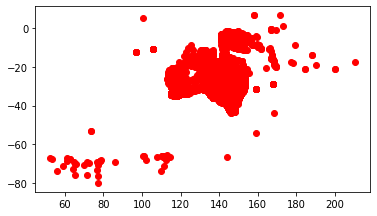

In [41]:
# point mapping
rain_gdf = geopandas.GeoDataFrame(
    rain_az_latlont, geometry=geopandas.points_from_xy(rain_az_latlont.Lon, rain_az_latlont.Lat))
#print(rain_gdf.head)

# map the points
rain_gdf.plot(color='red')